# **Doctor Fee Prediction**
<!-- ![alt text](https://pearlhealth.com/wp-content/uploads/2022/12/Machine-Learning__Feature.png) -->


# Team :


* Nour Sameh El Barbary
* Hoor Hisham
* Nour Almohamady
* Rawan Badr
* Mennatallah Maged


Note : comment the visualisation in cities for running faster

# Importing libraries and Reading Data

In [1]:
!pip install category_encoders

In [2]:
!pip install lightgbm

In [3]:
!pip install xgboost

In [4]:
import pandas as pd
import numpy as np
import time

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Check if the data is normally distributed
from scipy.stats import shapiro, boxcox
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sm

# Data analysis libraries
from scipy import stats
from scipy.stats import norm
from scipy.stats.mstats import winsorize
# from geopy.geocoders import Nominatim

# Preprocessing
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, MultiLabelBinarizer, LabelEncoder
import re
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder

# Set up the matplotlib backend for inline plotting
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# For modeling
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df_train = pd.read_csv("C:/Users/noura/Downloads/final ms2 ml/DoctorFeePrediction_Milestone2.csv")

Data Description

* **Doctor Name**: The name of the doctor.
* **City**: The city where the doctor is located.
* **Specialization**: The area of specialization or medical expertise of the doctor.
* **Doctor Qualification**: The qualifications or degrees held by the doctor.
* **Experience (Years)**: The number of years of experience the doctor has.
* **Total Reviews**: The total number of reviews received by the doctor.
* **Patient Satisfaction Rate (%age)**: The percentage of patients satisfied with the doctor's services.
* **Avg Time to Patients (mins)**: The average time taken by the doctor to attend to patients.
* **Wait Time (mins)**: The average wait time for patients before being attended to by the doctor.
* **Hospital Address**: The address of the hospital where the doctor practices.
* **Doctors Link**: A link to the doctor's profile or information.
* **Fee (PKR)**: The consultation fee charged by the doctor .

# **Task 1: Explore and Familiarize with the Dataset:**

<!-- ![alt text](https://assets-global.website-files.com/62c609e220cfd73d2f4f179b/639146ee91bb9016fd8cf0a3_Data%20Exploration%20(1).png) -->


In [6]:
df_train.shape

(2386, 12)

* Dataset consists of **```2386 rows```** and **```12 columns```**.

1 Dive into the dataset to uncover any peculiarities or unexpected patterns that may influence linear regression modeling.

2.Utilize domain knowledge to identify potential interactions or nonlinear relationships between features and the target variable **"Fee(PKR)"**.

In [7]:
df_train.head(40).style.background_gradient('Blues')

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee Category
0,Dr. Umair Hafeez,GUJRANWALA,Ent Specialist,"MBBS , FCPS ( Otorhinolaryngologic ENT )",6.000000,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-specialist/dr-umair-hafeez#reviews-scroll,Expensive
1,Dr. Haris Shakeel,RAJAN-PUR,General Physician,MBBS,1.000000,0,94,14,11,No Address Available,No Link Available,Cheap
2,Dr. Iqra Rehman,MIRPUR-KHAS,General Physician,"MBBS, RMP, CFP (USA), Certified in Covid 19 +",6.000000,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/general-physician/dr-iqra-rehman#reviews-scroll,Medium-Priced
3,Dr. Erum Memon,HYDERABAD,Gynecologist,"MBBS, FCPS (Gynae & Obstetrics)",11.000000,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gynecologist/dr-erum-memon#reviews-scroll,Cheap
4,Dr. Aisha Ahmad,LAHORE,Dermatologist,"MBBS, FCPS (Dermatology), Certified (Aesthetic Medicine)",12.000000,199,100,16,2,"Skinnovation, Johar Town, Lahore",https://www.marham.pk/doctors/lahore/dermatologist/dr-aisha-ahmad#reviews-scroll,Medium-Priced
5,Dr. Saadat Hashmi,ISLAMABAD,Urologist,"MBBS, FCPS",15.000000,22,96,15,9,"Maryam Memorial Hospital, Afzal Town, Rawalpindi",https://www.marham.pk/doctors/islamabad/urologist/dr-saadat-hashmi#reviews-scroll,Expensive
6,Dr. M.irfan,GUJRANWALA,Urologist,"MBBS,FCPS",10.000000,0,94,14,11,"Gondal Medical Complex Hospital, Civil Lines, Gujranwala",No Link Available,Medium-Priced
7,Prof. Dr. Abdul Rasheed Shaikh,KHAIRPUR,Urologist,"MBBS , Master Of Surgery (Urology)",33.000000,4,100,14,11,No Address Available,https://www.marham.pk/online-consultation/urologist/khairpur/prof-dr-abdul-rasheed-shaikh-30043#reviews-scroll,Medium-Priced
8,Dr. Awais Ahmad,NOWSHERA,Urologist,"MBBS, MCPS* (Urology)",3.000000,0,94,14,11,No Address Available,No Link Available,Medium-Priced
9,Dr. Aftab Alam,JHELUM,General Physician,"MBBS,FCPS Medicine, Training Geriatric Medicine UK, CHPE",10.000000,0,94,14,11,"Cmh Hospital, Cantt, Jhelum",No Link Available,Medium-Priced


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Doctor Name                      2386 non-null   object 
 1   City                             2386 non-null   object 
 2   Specialization                   2386 non-null   object 
 3   Doctor Qualification             2386 non-null   object 
 4   Experience(Years)                2386 non-null   float64
 5   Total_Reviews                    2386 non-null   int64  
 6   Patient Satisfaction Rate(%age)  2386 non-null   int64  
 7   Avg Time to Patients(mins)       2386 non-null   int64  
 8   Wait Time(mins)                  2386 non-null   int64  
 9   Hospital Address                 2386 non-null   object 
 10  Doctors Link                     2386 non-null   object 
 11  Fee Category                     2386 non-null   object 
dtypes: float64(1), int64

**Dataset Overview :**
1. No null values but there may be missing values
2. data need to be encoded "Doctor Name" , "City", "Specialization" , "Doctor Qualification" ,"Hospital Address", "Doctors Link"

## Checking for duplicates




In [9]:
df_train.duplicated().sum()

13

In [10]:
duplicate_rows = df_train[df_train.duplicated()]
duplicate_rows

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee Category
111,Dr. Ahmed Sajjad,ISLAMABAD,"Urologist, Sexologist, Andrologist","MBBS, FCPS (Urology)",33.0,387,97,14,11,"Medcity International Hospital, F-8, Islamabad",https://www.marham.pk/doctors/islamabad/urolog...,Expensive
297,Asst. Prof. Dr. Fahmina Ashfaq,LAHORE,"Internal Medicine Specialist, General Physicia...","MBBS, FCPS (Medicine), MRCP (Medicine)",14.0,128,96,14,11,"Naseer Hospital, Garden Town, Lahore",https://www.marham.pk/doctors/lahore/internal-...,Medium-Priced
468,Dr. Muhammad Asif,MARDAN,"Urologist, Sexologist","MBBS , FCPS ( Urology )",6.0,7,100,14,11,No Address Available,https://www.marham.pk/online-consultation/urol...,Medium-Priced
796,Dr. Muhammad Akram Kumbhar,ISLAMABAD,"Urologist, Sexologist","MBBS, M.S (Urology)",15.0,88,96,14,11,No Address Available,https://www.marham.pk/online-consultation/urol...,Medium-Priced
1161,Dr. Muzammil Ayub Mehar,GUJRANWALA,"General Physician, Pediatrician",MD,15.0,134,97,14,11,"Ali Family Clinic, Sialkot Road, Gujranwala",https://www.marham.pk/doctors/gujranwala/gener...,Cheap
1574,Dr. Muhammad Shahzad,PESHAWAR,"Urologist, Sexologist, Andrologist, Nephrologist","MBBS, FCPS, FICS(USA)",28.0,297,95,14,11,"Institute Of Kidney Diseases, Hayatabad, Peshawar",https://www.marham.pk/doctors/peshawar/urologi...,Medium-Priced
1600,Dr. Aftab Ali Malik,ISLAMABAD,"Urologist, Sexologist, Andrologist","MBBS, FCPS (Urology)",35.0,586,96,14,11,"Urology Clinic, Blue Area, Islamabad",https://www.marham.pk/doctors/islamabad/urolog...,Expensive
1763,Dr. Aasif Gurmani,DERA-GHAZI-KHAN,"Urologist, Sexologist, Andrologist","MBBS, FCPS (Urology), FCPS (General Surgery), ...",16.0,327,97,14,11,"Fatima Kidney Hospital, Near DHQ hospital, Der...",https://www.marham.pk/doctors/dera-ghazi-khan/...,Medium-Priced
1869,Prof. Dr. Ghulam Ali Mundrawala,KARACHI,"Gastroenterologist, General Physician","MBBS, MD (Medicine), MCPS (Forensic Medicine)",42.0,730,97,16,12,"Anklesaria Hospital, Preedy Quarters Karachi, ...",https://www.marham.pk/doctors/karachi/gastroen...,Medium-Priced
2005,Dr. Syed Babar Hussnain,GUJRAT,"General Physician, General Physician, Gastroen...","MBBS, MCPS (Medicine), FCPS (Medicine)",20.0,129,96,14,22,"Al Muzammil Medical Center, Marghzar Colony, G...",https://www.marham.pk/doctors/gujrat/gastroent...,Medium-Priced


In [11]:
df_train.drop_duplicates(inplace=True)

In [12]:
df_train.shape

(2373, 12)

In [13]:
df_train.nunique()

Doctor Name                        2190
City                                117
Specialization                      150
Doctor Qualification               1041
Experience(Years)                    52
Total_Reviews                       361
Patient Satisfaction Rate(%age)      25
Avg Time to Patients(mins)           28
Wait Time(mins)                      47
Hospital Address                   1178
Doctors Link                       1606
Fee Category                          3
dtype: int64

In [14]:
df_train.isnull().sum()

Doctor Name                        0
City                               0
Specialization                     0
Doctor Qualification               0
Experience(Years)                  0
Total_Reviews                      0
Patient Satisfaction Rate(%age)    0
Avg Time to Patients(mins)         0
Wait Time(mins)                    0
Hospital Address                   0
Doctors Link                       0
Fee Category                       0
dtype: int64

## Satistics for categorical columns.

In [15]:
df_train.describe(include='O').T

,count,unique,top,freq
Doctor Name,2373,2190,Dr. Muhammad Amjad,4
City,2373,117,LAHORE,151
Specialization,2373,150,General Physician,406
Doctor Qualification,2373,1041,MBBS,332
Hospital Address,2373,1178,No Address Available,552
Doctors Link,2373,1606,No Link Available,645
Fee Category,2373,3,Medium-Priced,1033


found out that most freq in these 2 cols 'Hospital Address' & 'Doctors Link	' No Address Available & No Link Available	**So** we may drop them

In [16]:
#0
def rename_cols(df):
  df.rename(columns={'Fee(PKR)': 'Fee'}, inplace=True)
  df.rename(columns={'Patient Satisfaction Rate(%age)': 'Patient_Satisfaction_Rate'}, inplace=True)
  df.rename(columns={'Experience(Years)': 'Experience_Years'}, inplace=True)
  df.rename(columns={'Avg Time to Patients(mins)': 'Avg_time_per_Patient'}, inplace=True)
  df.rename(columns={'Wait Time(mins)': 'Wait_Time'}, inplace=True)

In [17]:
rename_cols(df_train)

# Preprocessing For Train Set

## Doctor Name & Feature Engineering (Titles)

In [18]:
#1
def extract_titles_and_clean_name(name):
    # Define a regex pattern for titles
    title_regex = r'(Dr\.|Prof\.|Mr\.|Ms\.|Colonel|Assoc\. Prof\. Dr\.|Asst\. Prof\. Dr\.|Prof\. Dr\.)'

    # List of accepted titles
    accepted_titles = ["Dr", "Asst Prof Dr", "Prof, Dr", "Assoc Prof Dr"]

    # Find all titles in the name
    titles = re.findall(title_regex, name)

    # Clean the name by removing the extracted titles
    cleaned_name = re.sub(title_regex, '', name).strip()

    # Convert titles to a cleaned string without periods
    title_str = ', '.join(titles).replace('.', '').strip()

    # Check if the concatenated title string is in the list of accepted titles
    if title_str not in accepted_titles:
        title_str = 'others'

    return title_str, cleaned_name


df_train[['Titles', 'Cleaned Name']] = df_train['Doctor Name'].apply(lambda x: pd.Series(extract_titles_and_clean_name(x)))

df_train['Doctor Name'] = df_train['Cleaned Name']
df_train.drop('Cleaned Name', axis=1, inplace=True)

df_train.head()

,Doctor Name,City,Specialization,Doctor Qualification,Experience_Years,Total_Reviews,Patient_Satisfaction_Rate,Avg_time_per_Patient,Wait_Time,Hospital Address,Doctors Link,Fee Category,Titles
0,Umair Hafeez,GUJRANWALA,Ent Specialist,"MBBS , FCPS ( Otorhinolaryngologic ENT )",6.0,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,Expensive,Dr
1,Haris Shakeel,RAJAN-PUR,General Physician,MBBS,1.0,0,94,14,11,No Address Available,No Link Available,Cheap,Dr
2,Iqra Rehman,MIRPUR-KHAS,General Physician,"MBBS, RMP, CFP (USA), Certified in Covid 19 +",6.0,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,Medium-Priced,Dr
3,Erum Memon,HYDERABAD,Gynecologist,"MBBS, FCPS (Gynae &amp; Obstetrics)",11.0,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,Cheap,Dr
4,Aisha Ahmad,LAHORE,Dermatologist,"MBBS, FCPS (Dermatology), Certified (Aesthetic...",12.0,199,100,16,2,"Skinnovation, Johar Town, Lahore",https://www.marham.pk/doctors/lahore/dermatolo...,Medium-Priced,Dr


In [19]:
df_train['Titles'].value_counts()

Titles
Dr               1897
Asst Prof Dr      247
Prof, Dr          148
Assoc Prof Dr      79
others              2
Name: count, dtype: int64

## City Cleaning & Feature Engineering (Region)

In [20]:
"""
## comment this vis for faster running

import folium

# Creating a geolocator object
geolocator = Nominatim(user_agent="city_locator", timeout=45)  # Timeout set to 10 seconds


#  centroid of all cities
total_lat, total_lon = 0, 0
num_cities = len(cities)
for city in cities:
    location = geolocator.geocode(city)
    if location:
        total_lat += location.latitude
        total_lon += location.longitude

centroid_lat = total_lat / num_cities
centroid_lon = total_lon / num_cities

# Create a map centered around the centroid
m = folium.Map(location=[centroid_lat, centroid_lon], zoom_start=5, control_scale=True, width='60%', height='60%')

# Add markers for each city
for city in cities:
    location = geolocator.geocode(city)
    if location:
        folium.Marker(location=[location.latitude, location.longitude], popup=city, icon=folium.Icon(color='red')).add_to(m)

# Save the map to an HTML file
m.save('cities_map.html')

# Display the map
m
"""

'\n## comment this vis for faster running\n\nimport folium\n\n# Creating a geolocator object\ngeolocator = Nominatim(user_agent="city_locator", timeout=45)  # Timeout set to 10 seconds\n\n\n#  centroid of all cities\ntotal_lat, total_lon = 0, 0\nnum_cities = len(cities)\nfor city in cities:\n    location = geolocator.geocode(city)\n    if location:\n        total_lat += location.latitude\n        total_lon += location.longitude\n\ncentroid_lat = total_lat / num_cities\ncentroid_lon = total_lon / num_cities\n\n# Create a map centered around the centroid\nm = folium.Map(location=[centroid_lat, centroid_lon], zoom_start=5, control_scale=True, width=\'60%\', height=\'60%\')\n\n# Add markers for each city\nfor city in cities:\n    location = geolocator.geocode(city)\n    if location:\n        folium.Marker(location=[location.latitude, location.longitude], popup=city, icon=folium.Icon(color=\'red\')).add_to(m)\n\n# Save the map to an HTML file\nm.save(\'cities_map.html\')\n\n# Display the ma

In [21]:
df_train[['City']].describe().T

,count,unique,top,freq
City,2373,117,LAHORE,151


In [22]:
df_train['City'].unique()

array(['GUJRANWALA', 'RAJAN-PUR', 'MIRPUR-KHAS', 'HYDERABAD', 'LAHORE',
       'ISLAMABAD', 'KHAIRPUR', 'NOWSHERA', 'JHELUM', 'FAISALABAD',
       'VEHARI', 'OKARA', 'QUETTA', 'KARACHI', 'MULTAN', 'SAHIWAL',
       'PESHAWAR', 'BAHAWALNAGAR', 'BAHAWALPUR', 'SWABI',
       'DERA-GHAZI-KHAN', 'MANSEHRA', 'BANNU', 'SARGODHA', 'CHINIOT',
       'MARDAN', 'ATTOCK', 'ISTANBUL', 'RAHIM-YAR-KHAN', 'SADIQABAD',
       'DASKA', 'GUJRAT', 'GILGIT', 'LALAMUSA', 'KASUR', 'NAROWAL',
       'JACOBABAD', 'WAH-CANTT', 'NANKANA-SAHIB', 'HAFIZABAD', 'DUNYAPUR',
       'ABBOTTABAD', 'TAXILA', 'SHEIKHUPURA', 'THATTA', 'SIALKOT',
       'KHANPUR', 'JAMSHORO', 'HANGU', 'KHARIAN', 'LARKANA', 'KANDIARO',
       'MUZAFFAR-GARH', 'HARIPUR', 'SWAT', 'KOHAT', 'JHANG', 'KOT-ADDU',
       'RAWALAKOT', 'NAWABSHAH', 'BUREWALA', 'LAYYAH', 'SUKKUR',
       'DERA-ISMAIL-KHAN', 'MANDI-BAHAUDDIN', 'RENALA-KHURD', 'BHAKKAR',
       'CHAKWAL', 'JAUHARABAD', 'TIMERGARA', 'UMARKOT', 'MALAKAND',
       'BUNER', 'GUJAR-KHAN', 'K

In [23]:
#2
def assign_region_clean_city(df):
    # Define the city-region mappings
    punjab_cities = [
        'Lahore', 'Islamabad', 'Multan', 'Sahiwal', 'Okara', 'Faisalabad', 'Sargodha',
        'Gujranwala', 'Rawalakot', 'Gujrat', 'Sialkot', 'Sheikhupura', 'Kasur', 'Narowal',
        'Jhang', 'Khanewal', 'Toba Tek Singh', 'Chiniot', 'Pakpattan', 'Burewala', 'Vehari',
        'Rahim Yar Khan', 'Bahawalpur', 'Bahawalnagar', 'Lodhran', 'Layyah', 'Mianwali',
        'Muzaffar Garh', 'Dera Ghazi Khan', 'Bhakkar', 'Khushab', 'Mian Channu', 'Chichawatni',
        'Gojra', 'Shorkot', 'Samundri', 'Tando Muhammad Khan', 'Talagang', 'Kamoke', 'Shahkot',
        'Dinga', 'Bhalwal', 'Chakwal', 'Kharian', 'Daska', 'Hafizabad', 'Sadiqabad', 'Nankana Sahib',
        'Pattoki', 'Alipur', "Rajan Pur", "Jhelum", "Attock", "Lalamusa", "Wah Cantt",
        "Dunyapur", "Khanpur", "Kot Addu", "Mandi Bahauddin", "Renala Khurd",
        "Taxila", "Jauharabad", "Gujar Khan", "Wazirabad", "Pasrur",
        "Muridke", "Chishtian", "Kabirwala", "Jaranwala", "Dijkot"
    ]

    sindh_cities = [
        'Karachi', 'Hyderabad', 'Mirpur Khas', 'Sukkur', 'Nawabshah', 'Larkana', 'Jacobabad',
        'Khairpur', 'Thatta', 'Jamshoro', 'Ghotki', 'Shikarpur', 'Badin', 'Dadu', 'Khairpur Nathan Shah',
        'Moro', 'Hala', "Kandiaro", "Umarkot", "Kashmor", "Mithi", "Matiari", "Shahdadpur", "Baden"
    ]

    kpk_cities = [
        'Peshawar', 'Abbottabad', 'Nowshera', 'Swabi', 'Mardan', 'Mansehra', 'Haripur', 'Bannu',
        'Kohat', 'Dera Ismail Khan', 'Mingora', 'Charsadda', 'Timergara', 'Buner', 'Chitral', 'Dargai',
        "Hangu", "Swat", "Malakand", "Bajaur Agency"
    ]

    balochistan_cities = [
        'Quetta', 'Turbat', 'Chaman', 'Khuzdar', 'Gwadar', 'Loralai', 'Zhob', 'Sibi', 'Nushki',
        'Barkhan', 'Mastung', 'Duki'
    ]

    international_cities = [
        "Istanbul", "Riyadh", "Izmir"
    ]

    kashmir_cities = [
        'Gilgit', 'Kotli', 'Mirpur', 'Skardu'
    ]

    # Create a dictionary to map cities to their respective regions
    city_regions = {
        **{city: 'Punjab Region' for city in punjab_cities},
        **{city: 'Sindh Region' for city in sindh_cities},
        **{city: 'KPK Region' for city in kpk_cities},
        **{city: 'Balochistan Region' for city in balochistan_cities},
        **{city: 'International Region' for city in international_cities},
        **{city: 'Kashmir Region' for city in kashmir_cities}
    }

    # Clean the 'City' column
    df['City'] = df['City'].str.replace('-', ' ').str.title()

    # Map the cities to their respective regions using the dictionary
    df['Region'] = df['City'].map(city_regions)

    return df

df_train = assign_region_clean_city(df_train)

In [24]:
df_train['Region'].value_counts()

Region
Punjab Region           1474
KPK Region               399
Sindh Region             335
Balochistan Region       129
Kashmir Region            24
International Region      12
Name: count, dtype: int64

In [25]:
df_train.isnull().sum()

Doctor Name                  0
City                         0
Specialization               0
Doctor Qualification         0
Experience_Years             0
Total_Reviews                0
Patient_Satisfaction_Rate    0
Avg_time_per_Patient         0
Wait_Time                    0
Hospital Address             0
Doctors Link                 0
Fee Category                 0
Titles                       0
Region                       0
dtype: int64

## Specialization

### Cleaning

In [26]:
df_train[['Specialization']].describe().T

,count,unique,top,freq
Specialization,2373,150,General Physician,406


In [27]:
#2
def all_specialization_preprocessing(df):
  specialization_mapping = {
    "Pediatrician,Pediatric": "Pediatrician",
    "Lung Specialist": "Pulmonologist",
    "Eye Surgeon,Eye Specialist": "Ophthalmologist",
    "Sexologist": "Andrologist",
    "Cosmetic Surgeon,Dermatologist": "Cosmetic Dermatologist",
    "Internal Medicine Specialist,General Physician,Infectious Diseases": "Infectious Disease Specialist",
    'Dermatologist, Dermatologist, Allergy Specialist': 'Dermatologist, Allergy Specialist',
    'Plastic Surgeon, Cosmetic Surgeon, Plastic Surgeon, Dermatologist': "Cosmetic Dermatologist",
  }
  #clean
  def process_specialization(entry):
    entry = entry.replace('/', ',')

    specialties = [s.strip() for s in entry.split(',')]
    unique_specialties = []
    for specialty in specialties:
        if specialty not in unique_specialties:
            unique_specialties.append(specialty)
    # Join back into a string
    unique_specialties_str = ','.join(unique_specialties)
    return unique_specialties_str
  df['Specialization'] = df['Specialization'].apply(process_specialization)
  #map
  def map_specialization(specialization):
      for key, value in specialization_mapping.items():
          if key in specialization:
              return value
      return specialization
  df['Specialization'] = df['Specialization'].apply(map_specialization)

In [28]:
all_specialization_preprocessing(df_train)

In [29]:
df_train['Specialization'].nunique()

106

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373 entries, 0 to 2385
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Doctor Name                2373 non-null   object 
 1   City                       2373 non-null   object 
 2   Specialization             2373 non-null   object 
 3   Doctor Qualification       2373 non-null   object 
 4   Experience_Years           2373 non-null   float64
 5   Total_Reviews              2373 non-null   int64  
 6   Patient_Satisfaction_Rate  2373 non-null   int64  
 7   Avg_time_per_Patient       2373 non-null   int64  
 8   Wait_Time                  2373 non-null   int64  
 9   Hospital Address           2373 non-null   object 
 10  Doctors Link               2373 non-null   object 
 11  Fee Category               2373 non-null   object 
 12  Titles                     2373 non-null   object 
 13  Region                     2373 non-null   object 
dt

### Feature Engineering (Specialization Count)

In [31]:
#4
def calc_Specialization_count(df):
  df['Specialization Count'] = df['Specialization'].str.count(',') + 1

calc_Specialization_count(df_train)

In [32]:
max_specialization_count = df_train['Specialization Count'].max()
min_specialization_count = df_train['Specialization Count'].min()

print("Maximum number of specializations:", max_specialization_count)
print("Minimum number of specializations:", min_specialization_count)

Maximum number of specializations: 5
Minimum number of specializations: 1


drs that have 1 or 2 specialization are the most ppl that take higer fees that is expected 3shan e7na bnb2a 3wziin nroo7 le dactra mot5sesiin msh btoo3 kol 7aga

## Doctor Qualification

### **NLP**


In [33]:
"""
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Download NLTK resources (if not already downloaded)
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

# Initialize Lemmatizer and CountVectorizer
lemmatizer = WordNetLemmatizer()
vectorizer = CountVectorizer()

# Tokenization and Lemmatization
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization and convert to lowercase
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatization
    return ' '.join(tokens)

# Remove stopwords and perform lemmatization
stop_words = set(stopwords.words('english'))

# Apply preprocessing to each value in the 'Doctor Qualification' column
df_train['Cleaned Qualifidf_traintiondf_tradf_train_train] = df_train['Doctor Qualification'].apply(preprocess_text)

# Vectorization using Bag of Words
X = vdf_train_tradf_traintorizer.fidf_tradf_train_traintransform(df_train['Cleaned Qualifications'])

# X now contains the vectorized representation of 'Doctor Qualification' column
"""

"\nimport nltk\nfrom nltk.corpus import stopwords\nfrom nltk.tokenize import word_tokenize\nfrom nltk.stem import WordNetLemmatizer\nfrom sklearn.feature_extraction.text import CountVectorizer\n\n# Download NLTK resources (if not already downloaded)\n#nltk.download('punkt')\n#nltk.download('stopwords')\n#nltk.download('wordnet')\n\n# Initialize Lemmatizer and CountVectorizer\nlemmatizer = WordNetLemmatizer()\nvectorizer = CountVectorizer()\n\n# Tokenization and Lemmatization\ndef preprocess_text(text):\n    tokens = word_tokenize(text.lower())  # Tokenization and convert to lowercase\n    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatization\n    return ' '.join(tokens)\n\n# Remove stopwords and perform lemmatization\nstop_words = set(stopwords.words('english'))\n\n# Apply preprocessing to each value in the 'Doctor Qualification' column\ndf_train['Cleaned Qualifidf_traintiondf_tradf_train_train] = df_train['Doctor Qualification'].apply(preprocess_text)\n\n# Vector

In [34]:
# df_train.head()

In [35]:
# df_train['Doctor Qualification'].explode().value_counts()[:60]

there are typo error so will remove it

### Cleaning

In [36]:
df_train[['Doctor Qualification']].describe().T

,count,unique,top,freq
Doctor Qualification,2373,1041,MBBS,332


In [37]:
df_train["Doctor Qualification"].nunique()

1041

In [38]:
df_train["Doctor Qualification"].unique()

array([' MBBS , FCPS ( Otorhinolaryngologic ENT ) ', 'MBBS',
       'MBBS, RMP, CFP (USA), Certified in Covid 19 +', ...,
       ' MBBS , MCPS Dermatologist ',
       'MBBS, FCPS (OBSTETRICS &amp; GYNAECOLOGY), MS (Infertility &amp; Reproductive Medicine)',
       'MBBS, FCPS (VITREO-RETINA)'], dtype=object)

In [39]:
df_train['Doctor Qualification'].explode().value_counts()[:50]

Doctor Qualification
MBBS                                                                                                                                          332
MBBS, FCPS                                                                                                                                    133
 MBBS                                                                                                                                          78
MBBS,FCPS                                                                                                                                      68
MBBS, FCPS (Gastroenterology)                                                                                                                  40
MBBS, FCPS (Obstetrics &amp; Gynecology)                                                                                                       39
MBBS, FCPS (Orthopedic Surgery)                                                                        

In [40]:
#5
def clean_qualifications(df):
    # Combine and update all replacements into a single dictionary
    replacements = {
        r'\bPhD\b': 'PHD', r'\bM\.D\.\b': 'MD', r'\bD\.M\.S\b': 'DMS',
        r'\bB\.Sc\.\b': 'BSC', r'\bM\.S\.\b': 'MS', r'\bM\.Phil\b': 'MPHIL',
        r'\bG\.A\.M\.S\b': 'GAMS', r'\(D\.H\.B\)': 'DHB', r'\(D\.Ac\)': 'PHD',
        r'Ophtamology': 'Ophthalmology', r'Gastroentrology': 'Gastroenterology',
        r'OtoRhinoLaryngology': 'Otorhinolaryngology', r'Paediatrics': 'Pediatrics',
        r'Pulmonology': 'Pulmonary', r'ENT': 'Otolaryngology', r'OrthopedicSurgery': 'Orthopedic Surgery',
        r'NeuroSurgery': 'Neurosurgery', r'Medicine': 'Internal Medicine',
        r'OBSTETRICS&GYNAECOLOGY': 'Obstetrics&Gynecology', r'Gynecology&amp;Obstetrics': 'Gynecology and Obstetrics',
        r'Genecology&amp;Obstetrics': 'Gynecology and Obstetrics', r'OtorhinolaryngologicENT': 'Otorhinolaryngologic,ENT',
        r'MasterOfSurgery': 'Master of Surgery', r'MD\d*': 'MD', r'MDGastroenterology': 'MD,Gastroenterology',
        r'FCPSPediatrics': 'FCPS,Pediatrics', r'MBBSMD': 'MBBS,MD', r'FRCSOrthopedics': 'FRCS,Orthopedics',
        r'MCPSGynae/Obs': 'MCPS(Gynecology/Obs)', r'MD-RMP': 'MD, RMP', r'Masters\(NeuroSurgeon\)': 'Masters, Neurosurgery',
        r'\(|\)': '', r'[^a-zA-Z,]': '', r'Ophthalmologist': 'Ophthalmology', r'GASTROENTEROLOGY': 'Gastroenterology',
        r'MCPS,': 'MCPS', r'M\.D': 'MD', 'MD 1': 'MD'
    }

    # Apply all replacements
    df['Doctor Qualification'] = df['Doctor Qualification'].replace(replacements, regex=True)

    # Additional replacements to handle specific concatenations
    concatenations = {
        r'FCPSOBSTETRICSampGYNAECOLOGY': 'FCPS,Obstetrics&Gynecology',
        r'FCPSOtolaryngology': 'FCPS,Otolaryngology',
        r'MCPSFCPS': 'MCPS,FCPS'
    }
    df['Doctor Qualification'] = df['Doctor Qualification'].replace(concatenations, regex=True)

    # Remove all unnecessary spaces, then remove spaces around commas
    df['Doctor Qualification'] = df['Doctor Qualification'].str.replace(r'\s+', '')
    df['Doctor Qualification'] = df['Doctor Qualification'].str.replace(r'\s*,\s*', ',', regex=True)

    # Enhanced cleaning function
    def enhance_cleaning(qualification):
        # Replace HTML entities and correct specific cases
        qualification = qualification.replace('&amp;', '&')
        qualification = re.sub(r'(?<!\w)([A-Z]+)(?!\w)', lambda x: x.group(1), qualification)
        qualification = qualification.replace('DiplomainTBandChestDiseases', 'DTBCD')

        # Split, sort, and remove duplicates
        parts = sorted(set(qualification.split(',')))  # Remove duplicates and sort
        return ','.join(parts)

    # Apply the enhanced cleaning function
    df['Doctor Qualification'] = df['Doctor Qualification'].apply(enhance_cleaning)

    return df

df_train = clean_qualifications(df_train)

In [41]:
df_train['Doctor Qualification'].explode().value_counts()[:50]

Doctor Qualification
MBBS                                                                                                                     411
FCPS,MBBS                                                                                                                223
FCPSObstetricsampGynecology,MBBS                                                                                          65
FCPSOrthopedicSurgery,MBBS                                                                                                58
FCPSUrology,MBBS                                                                                                          58
FCPSGastroenterology,MBBS                                                                                                 53
FCPSDermatology,MBBS                                                                                                      47
FCPSPediatrics,MBBS                                                                                     

### Feature Engineering (Number of Qualification)

In [42]:
#6
def calc_No_of_qualifications(df):
  df['No_of_qualifications'] = df['Doctor Qualification'].apply(lambda x: len(x.split(",")))

In [43]:
calc_No_of_qualifications(df_train)
df_train['No_of_qualifications'].value_counts()

No_of_qualifications
2     1255
1      481
3      400
4      136
5       55
6       26
7       10
8        5
11       3
10       1
9        1
Name: count, dtype: int64

In [44]:
df_train['Doctor Qualification'].nunique()

848

## **Numerical Values**

Satistics for **Numerical** columns.

In [45]:
num_cols = df_train.select_dtypes(include=['int','float']).columns
num_cols

Index(['Experience_Years', 'Total_Reviews', 'Patient_Satisfaction_Rate',
       'Avg_time_per_Patient', 'Wait_Time', 'Specialization Count',
       'No_of_qualifications'],
      dtype='object')

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373 entries, 0 to 2385
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Doctor Name                2373 non-null   object 
 1   City                       2373 non-null   object 
 2   Specialization             2373 non-null   object 
 3   Doctor Qualification       2373 non-null   object 
 4   Experience_Years           2373 non-null   float64
 5   Total_Reviews              2373 non-null   int64  
 6   Patient_Satisfaction_Rate  2373 non-null   int64  
 7   Avg_time_per_Patient       2373 non-null   int64  
 8   Wait_Time                  2373 non-null   int64  
 9   Hospital Address           2373 non-null   object 
 10  Doctors Link               2373 non-null   object 
 11  Fee Category               2373 non-null   object 
 12  Titles                     2373 non-null   object 
 13  Region                     2373 non-null   object 
 1

In [47]:
# numerical_columns=['Experience_Years', 'Total_Reviews', 'Patient_Satisfaction_Rate', 'Avg_time_per_Patient', 'Wait_Time','No_of_qualifications']

In [48]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Experience_Years,2373.0,11.793721,8.744012,1.0,6.0,10.0,14.0,53.0
Total_Reviews,2373.0,91.650653,282.258562,0.0,0.0,8.0,53.0,5147.0
Patient_Satisfaction_Rate,2373.0,96.656131,4.974700,33.0,94.0,98.0,100.0,100.0
Avg_time_per_Patient,2373.0,14.091024,2.729078,3.0,14.0,14.0,15.0,50.0
Wait_Time,2373.0,11.260851,5.647961,0.0,10.0,11.0,11.0,82.0
Specialization Count,2373.0,1.080489,0.380615,1.0,1.0,1.0,1.0,5.0
No_of_qualifications,2373.0,2.245259,1.120719,1.0,2.0,2.0,3.0,11.0


array([[<Axes: title={'center': 'Experience_Years'}>,
        <Axes: title={'center': 'Total_Reviews'}>,
        <Axes: title={'center': 'Patient_Satisfaction_Rate'}>],
       [<Axes: title={'center': 'Avg_time_per_Patient'}>,
        <Axes: title={'center': 'Wait_Time'}>,
        <Axes: title={'center': 'Specialization Count'}>],
       [<Axes: title={'center': 'No_of_qualifications'}>, <Axes: >,
        <Axes: >]], dtype=object)

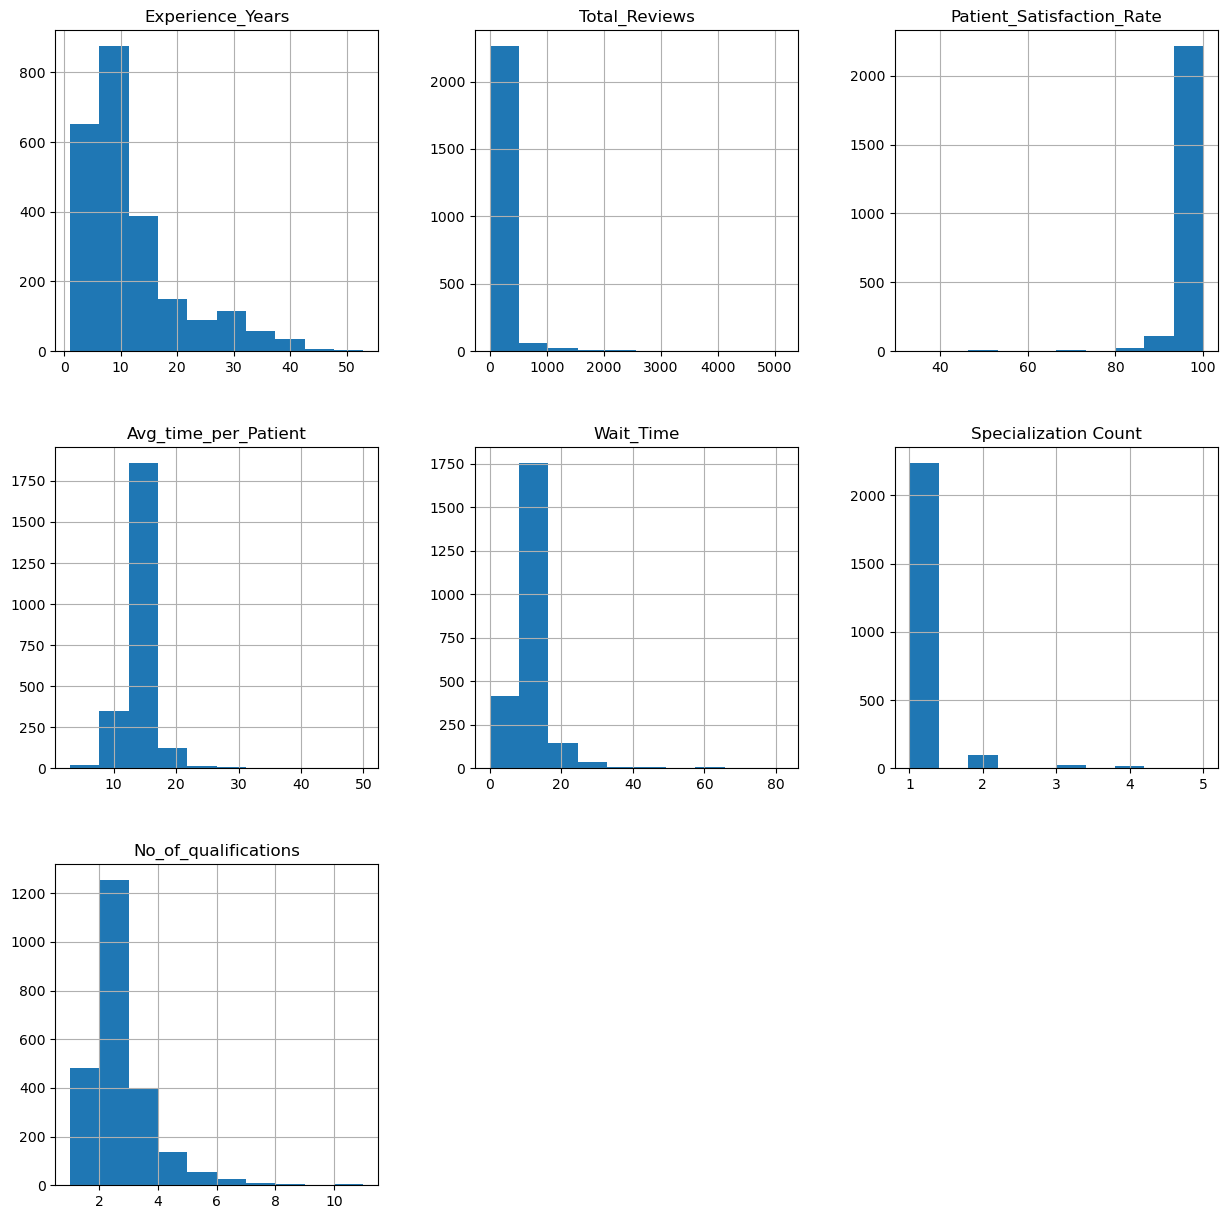

In [49]:
df_train[num_cols].hist(figsize=(15, 15))

we concluded that
1. experience is somehow normally distributed
2. total_reviews is right skewed and the max is > 2000 & min is almost 0
3.
4.try log to cancel skewness df_train['total_rooms'] = np.log(df_train['total_rooms'] +1)


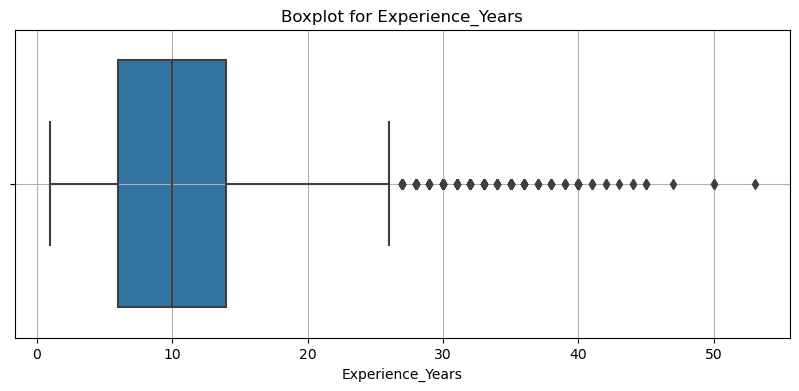

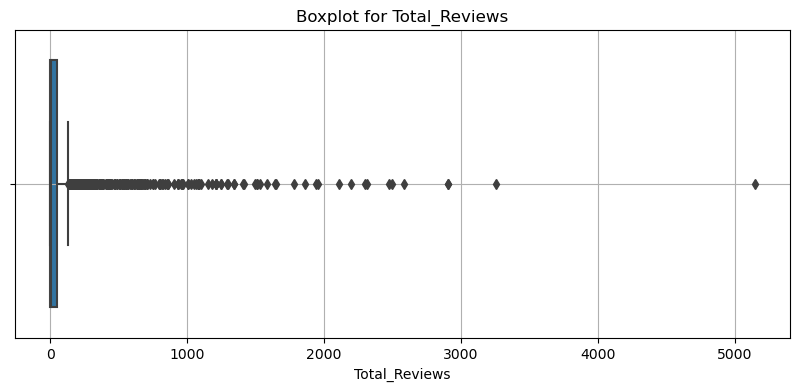

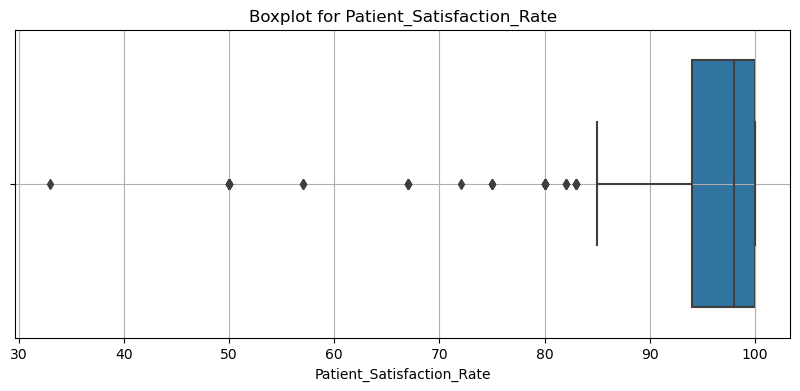

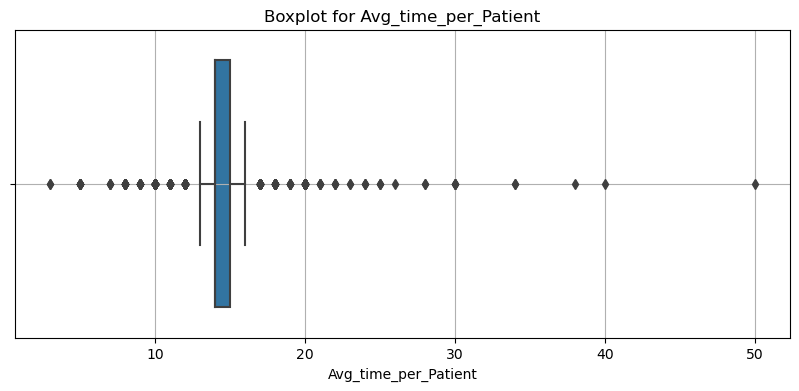

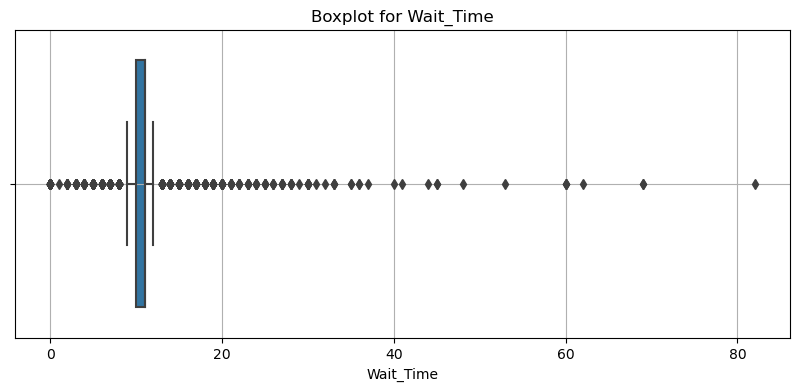

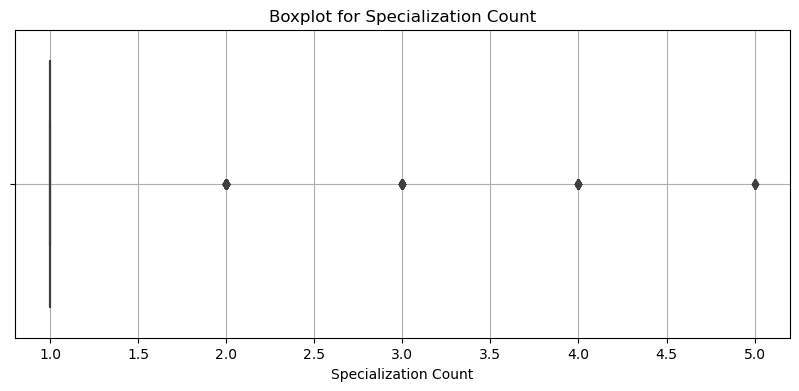

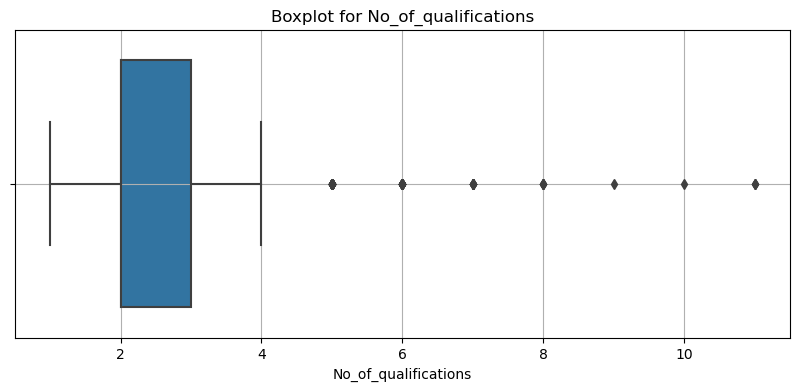

In [50]:
for column in num_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_train[column])
    plt.title(f'Boxplot for {column}')
    plt.grid(True)
    plt.show()

## Experience_Years & Feature Engineering (Experience_Group)

In [51]:
df_train[['Experience_Years']].describe().T

,count,mean,std,min,25%,50%,75%,max
Experience_Years,2373.0,11.793721,8.744012,1.0,6.0,10.0,14.0,53.0


In [52]:
df_train['Experience_Years'].value_counts()

Experience_Years
10.0    422
5.0     192
7.0     175
8.0     147
12.0    129
6.0     108
2.0     107
4.0      99
15.0     94
9.0      75
14.0     73
3.0      72
1.0      67
20.0     62
13.0     61
11.0     58
30.0     41
25.0     38
18.0     34
16.0     30
17.0     29
35.0     25
22.0     24
32.0     23
40.0     19
28.0     18
21.0     17
27.0     17
33.0     12
23.0     10
38.0      9
31.0      9
19.0      9
36.0      9
26.0      8
24.0      8
34.0      7
29.0      7
37.0      4
1.5       3
45.0      3
39.0      3
41.0      3
44.0      2
42.0      2
50.0      2
4.5       2
3.5       1
47.0      1
43.0      1
53.0      1
16.5      1
Name: count, dtype: int64

concluded that there are drs that have experience yrs 1.5 and 4.5 so will round them

most drs have experience 10 yrs

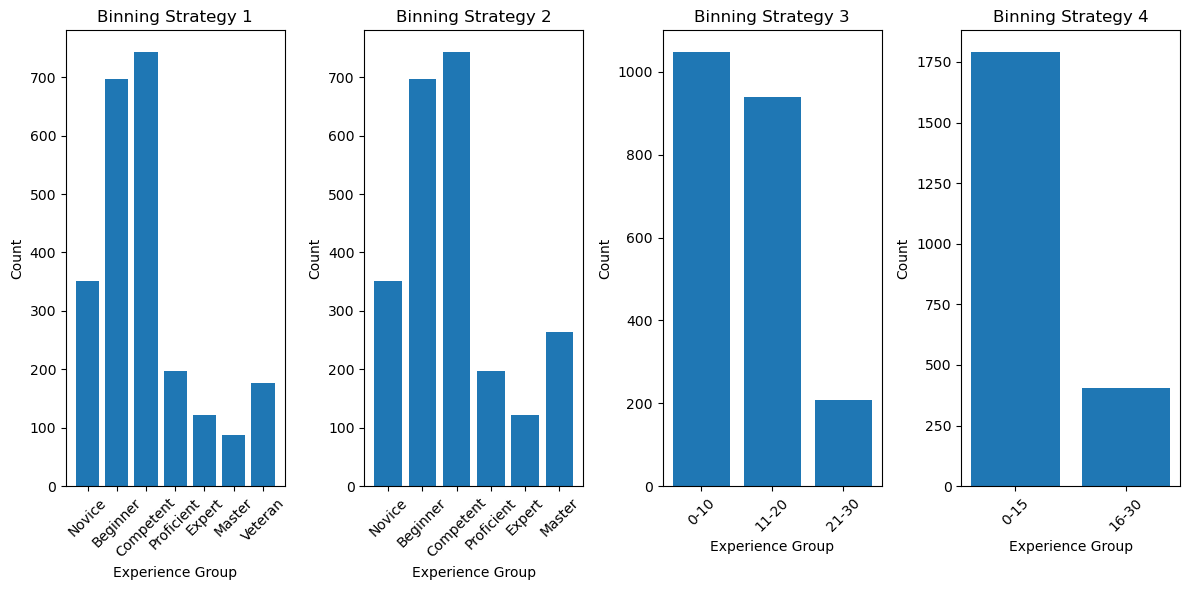

In [53]:
binning_strategies = [
    {'bins': [0, 5, 10, 15, 20, 25, 30, float('inf')], 'labels': ['Novice', 'Beginner', 'Competent', 'Proficient', 'Expert', 'Master', 'Veteran']},
    {'bins': [0, 5, 10, 15, 20, 25, float('inf')], 'labels': ['Novice', 'Beginner', 'Competent', 'Proficient', 'Expert', 'Master']},
    {'bins': [0, 10, 20, 30], 'labels': ['0-10', '11-20', '21-30']},
    {'bins': [0, 15, 30], 'labels': ['0-15', '16-30']}
]

plt.figure(figsize=(12, 6))
for i, strategy in enumerate(binning_strategies, 1):
    plt.subplot(1, len(binning_strategies), i)

    temp_df = df_train.copy()
    temp_df['Experience_Group'] = pd.cut(temp_df['Experience_Years'], bins=strategy['bins'], labels=strategy['labels'], right=False)
    grouped_data = temp_df.groupby('Experience_Group').size().reset_index(name='count')

    plt.bar(grouped_data['Experience_Group'], grouped_data['count'])
    plt.title(f'Binning Strategy {i}')
    plt.xlabel('Experience Group')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    temp_df.drop(columns=temp_df.columns, inplace=True)

plt.tight_layout()
plt.show()


* mmkn ndrop

In [54]:
#7
def binning_Experience(df):
  df['Experience_Years'] = df['Experience_Years'].round()
  bins = [0, 5, 10, 15, 20, 25, float('inf')]
  labels = ['Novice', 'Beginner', 'Competent', 'Proficient', 'Expert', 'Master']
  df['Experience_Group'] = pd.cut(df['Experience_Years'], bins=bins, labels=labels, right=True)

binning_Experience(df_train)

In [55]:
df_train

,Doctor Name,City,Specialization,Doctor Qualification,Experience_Years,Total_Reviews,Patient_Satisfaction_Rate,Avg_time_per_Patient,Wait_Time,Hospital Address,Doctors Link,Fee Category,Titles,Region,Specialization Count,No_of_qualifications,Experience_Group
0,Umair Hafeez,Gujranwala,Ent Specialist,"FCPSOtorhinolaryngologicOtolaryngology,MBBS",6.0,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,Expensive,Dr,Punjab Region,1,2,Beginner
1,Haris Shakeel,Rajan Pur,General Physician,MBBS,1.0,0,94,14,11,No Address Available,No Link Available,Cheap,Dr,Punjab Region,1,1,Novice
2,Iqra Rehman,Mirpur Khas,General Physician,"CFPUSA,CertifiedinCovid,MBBS,RMP",6.0,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,Medium-Priced,Dr,Sindh Region,1,4,Beginner
3,Erum Memon,Hyderabad,Gynecologist,"FCPSGynaeampObstetrics,MBBS",11.0,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,Cheap,Dr,Sindh Region,1,2,Competent
4,Aisha Ahmad,Lahore,Dermatologist,"CertifiedAestheticInternalMedicine,FCPSDermato...",12.0,199,100,16,2,"Skinnovation, Johar Town, Lahore",https://www.marham.pk/doctors/lahore/dermatolo...,Medium-Priced,Dr,Punjab Region,1,3,Competent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,Amna Rizwan,Lahore,"Eye Specialist,Eye Surgeon","FCPSVITREORETINA,MBBS",10.0,11,100,14,11,"Wahdat clinic, Wahdat Road, Lahore",https://www.marham.pk/doctors/lahore/eye-speci...,Medium-Priced,Dr,Punjab Region,2,2,Beginner
2382,Misbah Fatima,Okara,Pediatrician,"FCPSPediatrics,MBBS",10.0,7,100,14,11,"Zayyan Kidney and Child Care Clinic, Okara, Okara",https://www.marham.pk/doctors/okara/pediatrici...,Medium-Priced,Dr,Punjab Region,1,2,Beginner
2383,Muhammad Kashif,Rahim Yar Khan,Dermatologist,"FellowAmericanAestheticAssociation,MBBS",10.0,103,95,15,12,"Moosa Skin &amp; Laser Clinic, punjab, Rahim Y...",https://www.marham.pk/doctors/sadiqabad/dermat...,Medium-Priced,Dr,Punjab Region,1,2,Beginner
2384,Ahmed Ayyaz,Sahiwal,Nephrologist,"MBBS,MDNephrology",12.0,23,100,14,12,"Sahiwal International Hospital, Near General B...",https://www.marham.pk/doctors/sahiwal/nephrolo...,Medium-Priced,Asst Prof Dr,Punjab Region,1,2,Competent


In [56]:
df_train.isnull().sum()

Doctor Name                  0
City                         0
Specialization               0
Doctor Qualification         0
Experience_Years             0
Total_Reviews                0
Patient_Satisfaction_Rate    0
Avg_time_per_Patient         0
Wait_Time                    0
Hospital Address             0
Doctors Link                 0
Fee Category                 0
Titles                       0
Region                       0
Specialization Count         0
No_of_qualifications         0
Experience_Group             0
dtype: int64

In [57]:
df_train.dtypes

Doctor Name                    object
City                           object
Specialization                 object
Doctor Qualification           object
Experience_Years              float64
Total_Reviews                   int64
Patient_Satisfaction_Rate       int64
Avg_time_per_Patient            int64
Wait_Time                       int64
Hospital Address               object
Doctors Link                   object
Fee Category                   object
Titles                         object
Region                         object
Specialization Count            int64
No_of_qualifications            int64
Experience_Group             category
dtype: object

## Wait Time & Feature Engineering (Total Time)

In [58]:
#8
def calc_Total_time(df):
  df['Total Time'] = df['Avg_time_per_Patient'] + df['Wait_Time']

In [59]:
calc_Total_time(df_train)
df_train

,Doctor Name,City,Specialization,Doctor Qualification,Experience_Years,Total_Reviews,Patient_Satisfaction_Rate,Avg_time_per_Patient,Wait_Time,Hospital Address,Doctors Link,Fee Category,Titles,Region,Specialization Count,No_of_qualifications,Experience_Group,Total Time
0,Umair Hafeez,Gujranwala,Ent Specialist,"FCPSOtorhinolaryngologicOtolaryngology,MBBS",6.0,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,Expensive,Dr,Punjab Region,1,2,Beginner,25
1,Haris Shakeel,Rajan Pur,General Physician,MBBS,1.0,0,94,14,11,No Address Available,No Link Available,Cheap,Dr,Punjab Region,1,1,Novice,25
2,Iqra Rehman,Mirpur Khas,General Physician,"CFPUSA,CertifiedinCovid,MBBS,RMP",6.0,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,Medium-Priced,Dr,Sindh Region,1,4,Beginner,10
3,Erum Memon,Hyderabad,Gynecologist,"FCPSGynaeampObstetrics,MBBS",11.0,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,Cheap,Dr,Sindh Region,1,2,Competent,28
4,Aisha Ahmad,Lahore,Dermatologist,"CertifiedAestheticInternalMedicine,FCPSDermato...",12.0,199,100,16,2,"Skinnovation, Johar Town, Lahore",https://www.marham.pk/doctors/lahore/dermatolo...,Medium-Priced,Dr,Punjab Region,1,3,Competent,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,Amna Rizwan,Lahore,"Eye Specialist,Eye Surgeon","FCPSVITREORETINA,MBBS",10.0,11,100,14,11,"Wahdat clinic, Wahdat Road, Lahore",https://www.marham.pk/doctors/lahore/eye-speci...,Medium-Priced,Dr,Punjab Region,2,2,Beginner,25
2382,Misbah Fatima,Okara,Pediatrician,"FCPSPediatrics,MBBS",10.0,7,100,14,11,"Zayyan Kidney and Child Care Clinic, Okara, Okara",https://www.marham.pk/doctors/okara/pediatrici...,Medium-Priced,Dr,Punjab Region,1,2,Beginner,25
2383,Muhammad Kashif,Rahim Yar Khan,Dermatologist,"FellowAmericanAestheticAssociation,MBBS",10.0,103,95,15,12,"Moosa Skin &amp; Laser Clinic, punjab, Rahim Y...",https://www.marham.pk/doctors/sadiqabad/dermat...,Medium-Priced,Dr,Punjab Region,1,2,Beginner,27
2384,Ahmed Ayyaz,Sahiwal,Nephrologist,"MBBS,MDNephrology",12.0,23,100,14,12,"Sahiwal International Hospital, Near General B...",https://www.marham.pk/doctors/sahiwal/nephrolo...,Medium-Priced,Asst Prof Dr,Punjab Region,1,2,Competent,26


## Scaling Data

In [60]:
num_cols = df_train.select_dtypes(include=['int','float']).columns
num_cols

Index(['Experience_Years', 'Total_Reviews', 'Patient_Satisfaction_Rate',
       'Avg_time_per_Patient', 'Wait_Time', 'Specialization Count',
       'No_of_qualifications', 'Total Time'],
      dtype='object')

In [61]:
def show_distributions(data,col):
    plt.figure(figsize=(8, 4))
    # Plotting the first distribution
    plt.subplot(1, 3, 1)
    sns.histplot(np.log1p(data[col]),kde=True,  color='blue')
    plt.title('log transformation')


    # Plotting the second distribution
    plt.subplot(1, 3, 2)
    sns.histplot(np.cbrt(data[col]),kde=True,  color='red')
    plt.title('cubic root transformation')

    # Plotting the third distribution
    plt.subplot(1, 3, 3)
    sns.histplot(np.sqrt(data[col]), kde=True, color='green')
    plt.title('sqaure root transformation')

    plt.suptitle(f'Distributions for column {col}', fontsize=16, y=1.05)


    plt.tight_layout()
    plt.show()
    print(f"Skewness with log = {np.log1p(data[col]).skew()} and with cubic root = {np.cbrt(data[col]).skew()} and with square root = {np.sqrt(data[col]).skew()}")

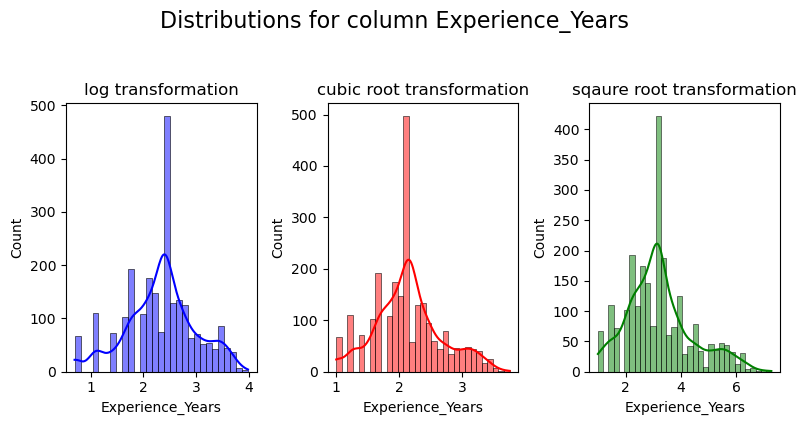

Skewness with log = -0.19630377398421936 and with cubic root = 0.27461628805244415 and with square root = 0.6339312051017133


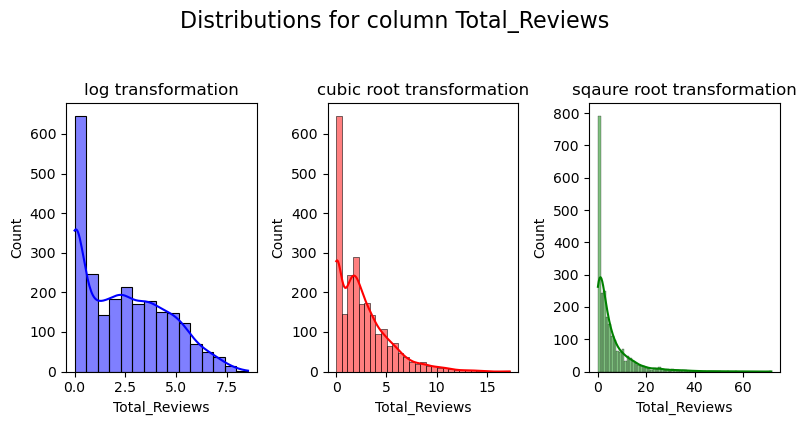

Skewness with log = 0.4672355807848215 and with cubic root = 1.4131794016958534 and with square root = 2.690376147410553


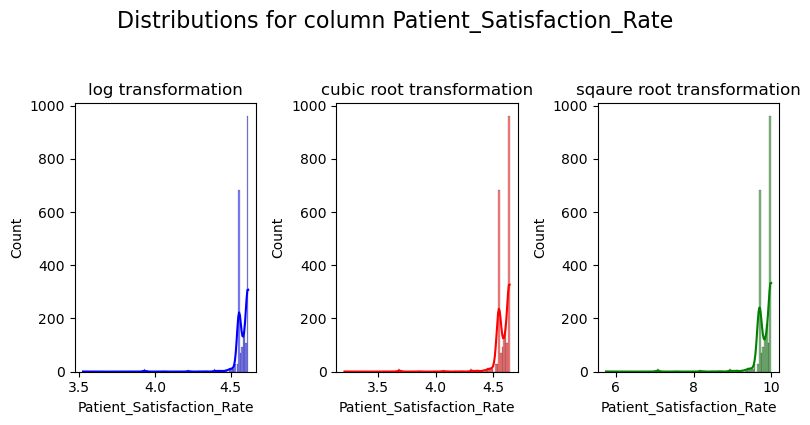

Skewness with log = -7.569360448568509 and with cubic root = -6.737552826837317 and with square root = -6.342565700206496


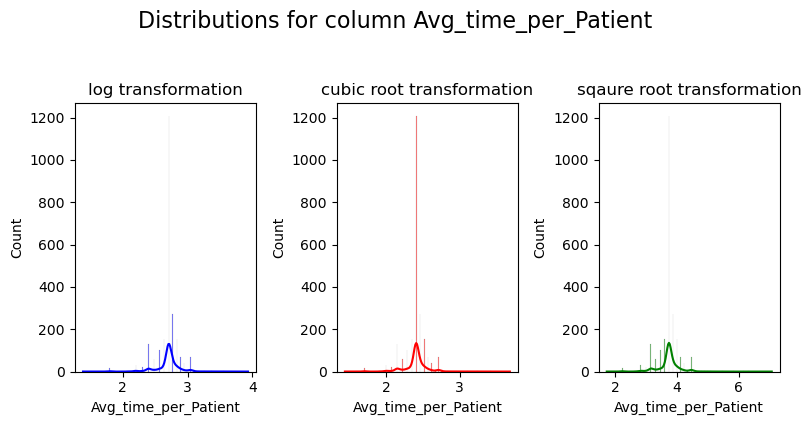

Skewness with log = -0.9670518914997163 and with cubic root = -0.17644605009166223 and with square root = 0.36649621928207754


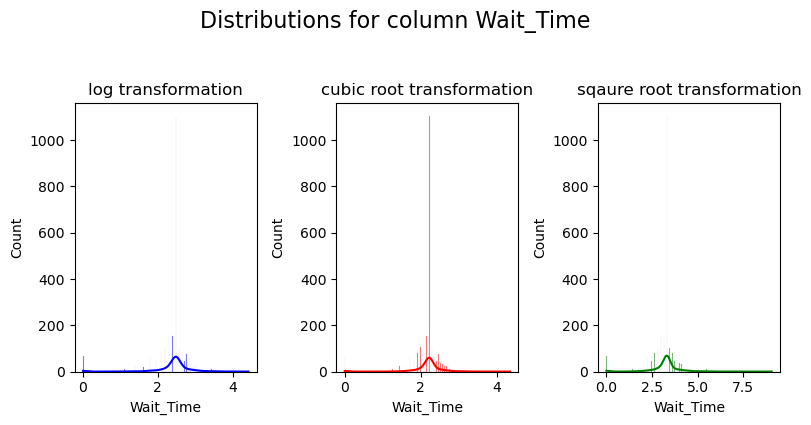

Skewness with log = -2.486415842963584 and with cubic root = -2.502117714417824 and with square root = -0.523392185436547


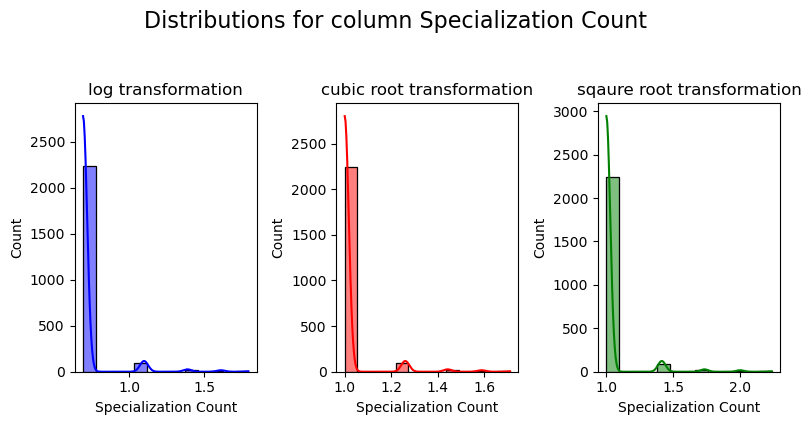

Skewness with log = 4.965846717271339 and with cubic root = 4.975484187741867 and with square root = 5.185546818968113


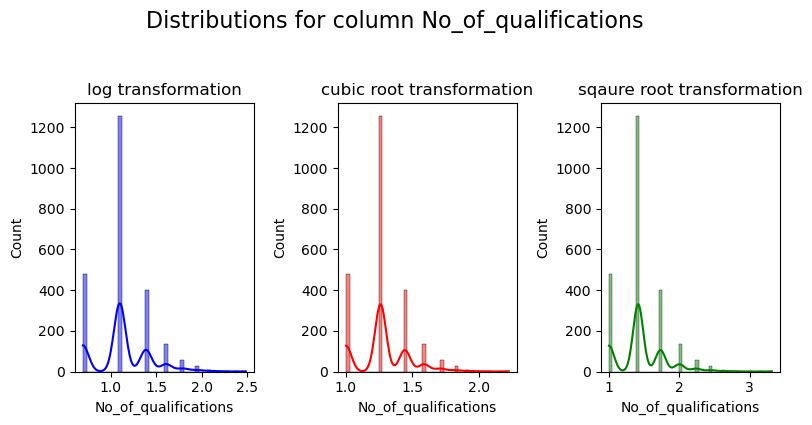

Skewness with log = 0.5895046083232907 and with cubic root = 0.6700102368327907 and with square root = 0.991396942120799


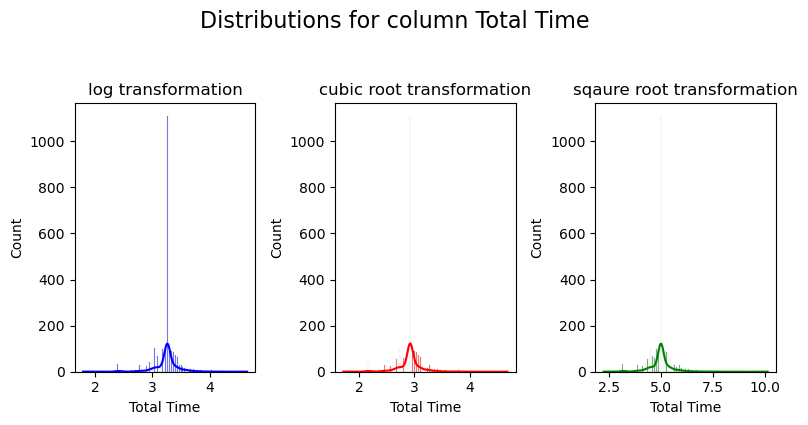

Skewness with log = -0.6534507547228723 and with cubic root = 0.5190197655868941 and with square root = 1.24796083681038


In [62]:
for col in num_cols:
    show_distributions(df_train,col)

In [63]:
def calculate_outliers(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [64]:
for col in num_cols:
    lower_limit, upper_limit = calculate_outliers(df_train[col])
    lower_outliers = len(df_train[df_train[col] < lower_limit])
    upper_outliers = len(df_train[df_train[col] > upper_limit])
    total_outliers = lower_outliers + upper_outliers
    outlier_percentage = (total_outliers / df_train.shape[0]) * 100

    print(f"Total outliers in column before log transformation {col}: {total_outliers}, Percentage: {outlier_percentage}%")
    print('-'*100)

Total outliers in column before log transformation Experience_Years: 218, Percentage: 9.186683522966709%
----------------------------------------------------------------------------------------------------
Total outliers in column before log transformation Total_Reviews: 348, Percentage: 14.664981036662454%
----------------------------------------------------------------------------------------------------
Total outliers in column before log transformation Patient_Satisfaction_Rate: 38, Percentage: 1.6013485040033713%
----------------------------------------------------------------------------------------------------
Total outliers in column before log transformation Avg_time_per_Patient: 583, Percentage: 24.568057311420144%
----------------------------------------------------------------------------------------------------
Total outliers in column before log transformation Wait_Time: 857, Percentage: 36.11462284028656%
------------------------------------------------------------------

In [65]:
#9
cols_minmax = ['Experience_Years','Total_Reviews','Total Time']
def apply_log_transform(df, columns):
    for col in columns:
        df[col] = np.log1p(df[col])

# columns_to_transform = ['Experience_Years', 'Patient_Satisfaction_Rate',
#                        'Avg_time_per_Patient', 'Wait_Time', 'Total Time','Total_Reviews']

apply_log_transform(df_train, cols_minmax)

In [66]:
for col in num_cols:
    lower_limit, upper_limit = calculate_outliers(df_train[col])
    lower_outliers = len(df_train[df_train[col] < lower_limit])
    upper_outliers = len(df_train[df_train[col] > upper_limit])
    total_outliers = lower_outliers + upper_outliers
    outlier_percentage = (total_outliers / df_train.shape[0]) * 100

    print(f"Total outliers in column before log transformation {col}: {total_outliers}, Percentage: {outlier_percentage}%")
    print('-'*100)

Total outliers in column before log transformation Experience_Years: 71, Percentage: 2.9919932574799835%
----------------------------------------------------------------------------------------------------
Total outliers in column before log transformation Total_Reviews: 0, Percentage: 0.0%
----------------------------------------------------------------------------------------------------
Total outliers in column before log transformation Patient_Satisfaction_Rate: 38, Percentage: 1.6013485040033713%
----------------------------------------------------------------------------------------------------
Total outliers in column before log transformation Avg_time_per_Patient: 583, Percentage: 24.568057311420144%
----------------------------------------------------------------------------------------------------
Total outliers in column before log transformation Wait_Time: 857, Percentage: 36.11462284028656%
-----------------------------------------------------------------------------------

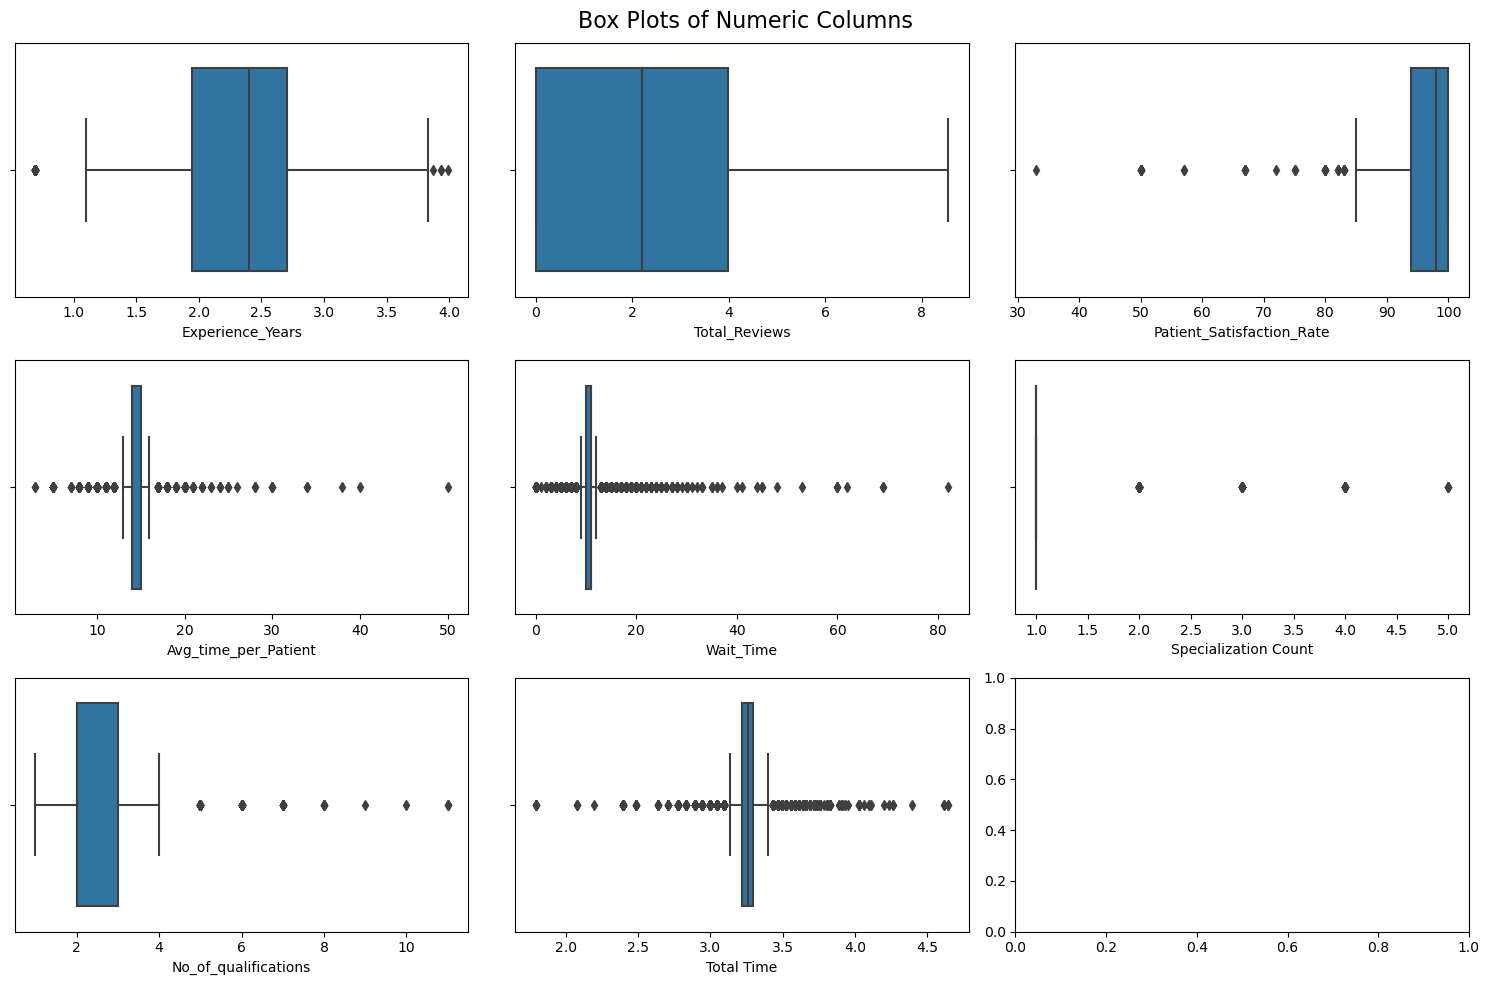

In [67]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten axes for easier iteration
axes = axes.flatten()

# Iterate over columns and create box plots
for i, col in enumerate(num_cols):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title("")  # Clear the title for individual plots

# Set a common title for all plots
fig.suptitle('Box Plots of Numeric Columns', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

In [68]:
# # numerical_columns=['Experience_Years', 'Total_Reviews', 'Patient_Satisfaction_Rate', 'Avg_time_per_Patient',
# #                    'Wait_Time','No_of_qualifications']
# num_cols = ['Experience_Years', 'Total_Reviews', 'Patient_Satisfaction_Rate','Avg_time_per_Patient', 'Wait_Time',
#             'Specialization Count','No_of_qualifications', 'Total Time']
# num_cols

### mm scaling

In [69]:
# cols_minmax = ['Experience_Years','Total_Reviews','Total Time']
# scaler = MinMaxScaler()
# for col in cols_minmax:
#   df_train[col] = scaler.fit_transform(df_train[[col]])

<Figure size 800x400 with 0 Axes>

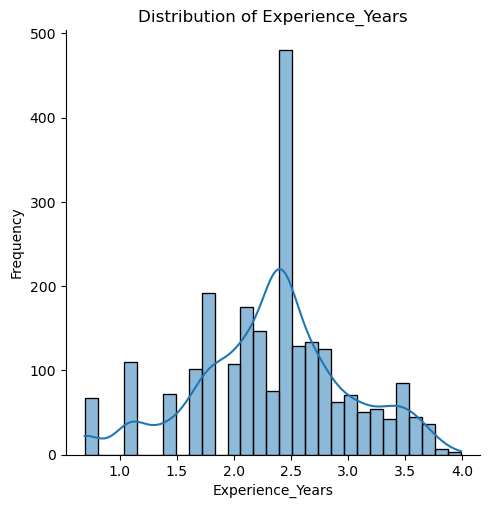

<Figure size 800x400 with 0 Axes>

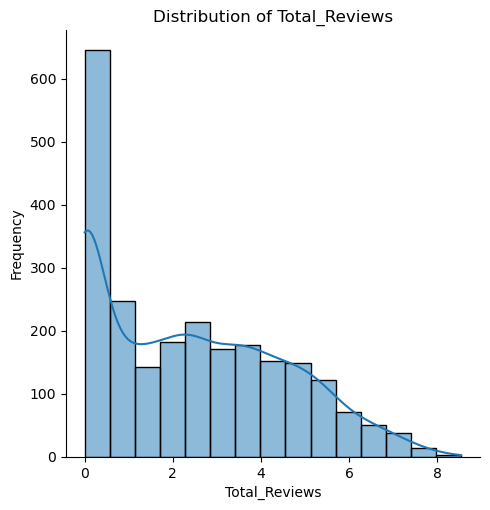

<Figure size 800x400 with 0 Axes>

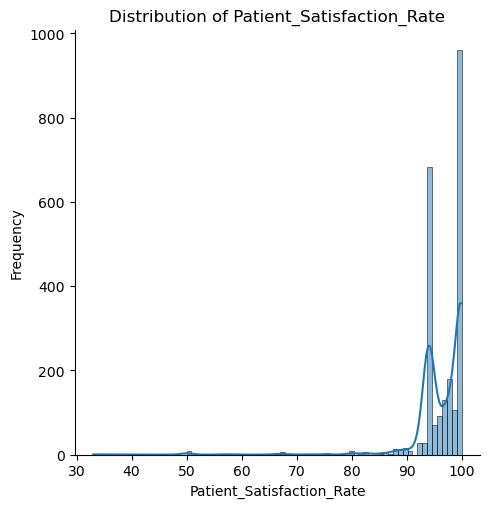

<Figure size 800x400 with 0 Axes>

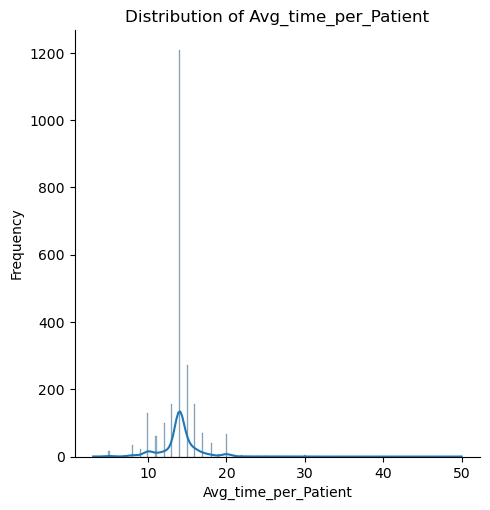

<Figure size 800x400 with 0 Axes>

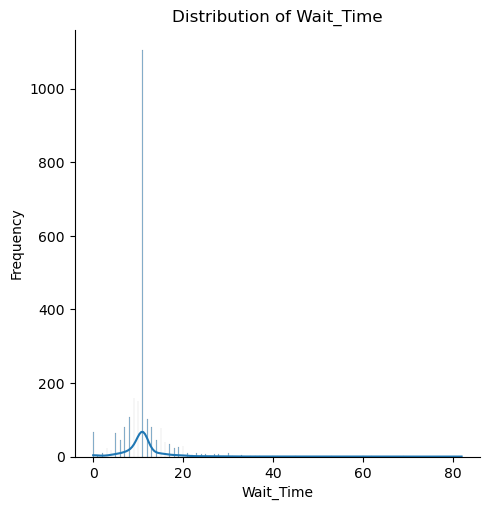

<Figure size 800x400 with 0 Axes>

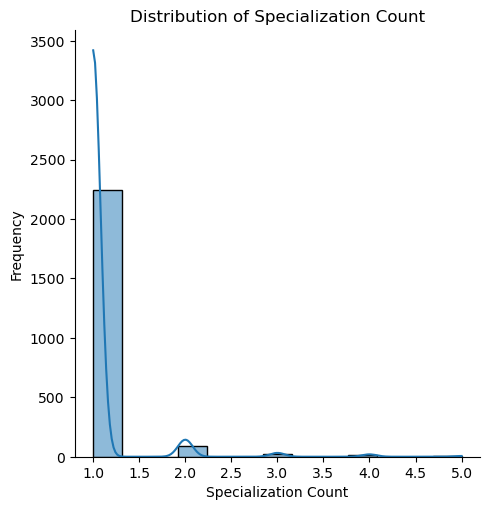

<Figure size 800x400 with 0 Axes>

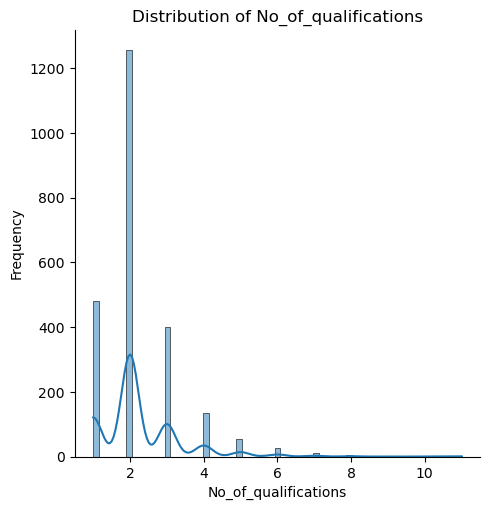

<Figure size 800x400 with 0 Axes>

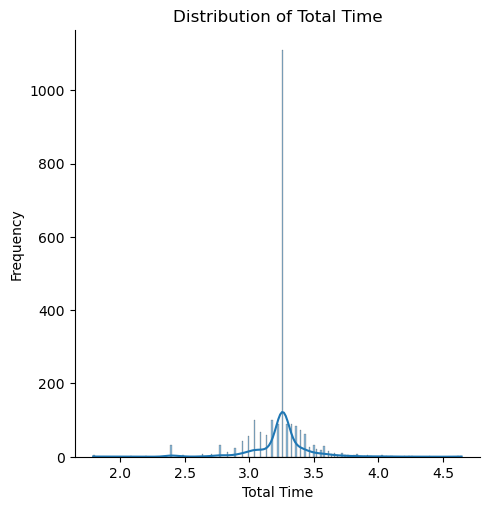

In [70]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.displot(x=df_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Analysis

## Doctor/City

In [71]:
# doctor_count_by_city = df_train['City'].value_counts().reset_index()
# doctor_count_by_city.columns = ['City', 'Number of Doctors']

# # Create the bar plot using Plotly Express
# fig = px.bar(doctor_count_by_city, x='City', y='Number of Doctors',
#              title='Number of Doctors in Each City',
#              labels={'Number of Doctors': 'Number of Doctors', 'City': 'City'})
# fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability
# fig.show()

In conclusion, the analysis reveals that Karachi has the highest number of doctors compared to other cities in the dataset. However, it's worth noting that several cities have only one doctor listed. This discrepancy in the distribution of doctors across cities might indicate variations in healthcare accessibility and resource allocation.

In [72]:
# fees_1_doctor = df_train_train_df_trainain_df_tradf_train_trainain[df_train['City'].isin(cities_with_1_doctor)]['Fee']

# # Fees of doctors in cities with 144 dodf_trainodf_tradf_train
# feesdf_train_df_trainain4df_trainddf_train_df_tradf_trainaintorsdf_train_train df_train[df_train['City'].isin(cities_with_144_doctors)]['Fee']

# # Create a box plot
# plt.figure(figsize=(8, 6))
# plt.boxplot([fees_1_doctor, fees_144_doctors], labels=['1 Doctor', '144 Doctors'])
# plt.title('Comparison of Doctor Fees in Cities with 1 Doctor vs. 144 Doctors')
# plt.xlabel('City Count')
# plt.ylabel('Doctor Fee')
# plt.show()

Cities with **1** doctor have a fee range from **0 to 1000**, whereas cities with **144** doctors have a wider fee range from **$200 to 5000** This indicates greater variability in the fees charged by doctors in cities with a higher concentration of doctors.



* avg comparing

In cities with only 1 doctor, the mean fee charged is significantly lower at approximately 493.33 compared to cities with 144 doctors, where the mean fee is substantially higher at approximately 1524.31. This suggests that there is a noticeable difference in the average fees depending on the number of doctors in a city.

## City

In [73]:
# FeesbyCity= df_train[['City','Fee']].groupby('City').agg('mean').sort_values('Fee')

# fig = px.bar(FeesbyCity.reset_index(), x='City', y='Fee', color='City', text='Fee')

# fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))

# fig.update_layout(title='<b>Average Doctor Fee by City</b>', title_x=0.5, font_family="Times New Roman", title_font_family="Times New Roman")

# fig.show()

the avg fees are in LAHORE city lets dive into it and see fees of drs in this city , whilr in IZMIR is the lowes avg tends to 0

In [74]:
# lahore_city_fees = df_train_train_df_trainain_df_train_trainain[df_train['City'] == 'Lahore']['Fee']
# lahore_min_fee = lahore_city_fees.min()
# lahore_max_fee = lahore_city_fees.max()

# print("Minimum fee in LAHORE:", lahore_min_fee)
# print("Maximum fee in LAHORE:", lahore_max_fee)

The fees vary considerable, with a standard deviation of approximately 1369.37, suggesting a wide range of fee amounts.

In [75]:
# average_fees_by_city = df_train.groupby('City')['Fee'].mean()

# city_with_min_avg_fees = average_fees_by_city.idxmin()
# min_avg_fees = average_fees_by_city.min()

# print(f"The city with the minimum average fees is {city_with_min_avg_fees} with an average fee of ${min_avg_fees:.2f}.")


In [76]:
# izmir_reviews = df_train_train_df_trainain_df_train_trainain[df_train['City'] == 'Izmir']

# total_reviews_in_izmir = izmir_reviews['Total_Reviews'].sum()

# print(f"The total number of reviews in Izmir is {total_reviews_in_izmir}.")


In [77]:
# izmir_rows = df_train_train_df_trainain_df_train_trainain[df_train['City'] == 'Izmir']

# izmir_rows

In [78]:
# df_train.shape

In [79]:
# # Computes the maximum fee within each city group
# MaxFeesByCity = df_train.groupby('City')['Fee'].max().reset_index()

# fig = px.bar(MaxFeesByCity, x='City', y='Fee', color='City', text='Fee')

# fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))

# fig.update_layout(title='<b>Maximum Doctor Fee by City</b>',
#                   title_x=0.5,
#                   font_family="Times New Roman",
#                   title_font_family="Times New Roman")

# fig.show()

In [80]:
# gujranwala_rows = df_train_train_df_trainain_df_train_trainain[df_train['City'] == 'Gujranwala']

# gujranwala_fee_stats = gujranwala_rows['Fee'].describe()

# print("Summary Statistics for Fees in GUJRANWALA:")
# print(gujranwala_fee_stats)

a wide range of fees charged by doctors in the city, with a minimum fee of 20 and a maximum fee of 10,000. The mean fee of approximately 1259.53 indicates the average cost of medical services

----------------------
(IQR) of 800 (from 700 to 1500) suggests that the middle 50% of fees are relatively consistent, with the median fee (1000) falling within this range. This indicates that while there is considerable variability in fees, **a significant portion of doctors charge fees within a certain range**

## Specialization Analysis

In [81]:
# #doctors for each specialization
# specialization_counts = df_train['Specialization'].value_counts()

# popular_specializations = specialization_counts[specialization_counts >= 183].index

# popular_specializadf_trainodf_df_trainainrdf_df_trainadf_df_trainainsdf_df_trainadf_tradf_train df_train[df_train['Specialization'].isin(popular_specializations)]

# fees_of_popular_specializations = popular_specialization_rows['Fee']

# data = {'Specialization': popular_specialization_rows['Specialization'], df_trainee': fees_df_tradf_train_popular_sdf_train_traincialdf_tradf_trainations}
# df_df_trainain_plot =df_tradf_traind.DataFramdf_tradf_traindata)

# fdf_tradf_train = px.bar(df_train_plot, x='Specialization', y='Fee', title='Fees of Specializations with 183 Doctors or More')
# fig.show()

In [82]:
# max_fees = popular_specialization_rows.groupby('Specialization')['Fee'].max()
# min_fees = popular_specialization_rows.groupby('Specialization')['Fee'].min()

# for specialization in popular_specializations:
#     print(f"Specialization: {specialization}")
#     print(f"Maximum Fee: {max_fees[specialization]}")
#     print(f"Minimum Fee: {min_fees[specialization]}")
#     print()

In [83]:
# df_train.Specialization.value_counts()

In [84]:
# plt.figure(figsize=(12, 6))

# top_10_specializations = df['Specialization'].value_counts().head(10).index

# filtered_df = df[df['Specialization'].isin(top_10_specializations)]

# sns.barplot(x='Specialization', y='Fee', data=filtered_df)

# # Rotate the x-axis labels by 45 degrees
# plt.xticks(rotation=45)

# # Show the plot
# plt.show()


In [85]:
# data = df_train.groupby(['Experience_Years', 'Specialization']).apply(lambda x: x['Patient_Satisfaction_Rate'].count()).reset_index(name='Rating')

# fig = px.line(data, x='Experience_Years', y='Rating', color='Specialization', title='Number of Ratings by Experience Years and Specialization')
# fig.show()


Drs with less experiene have highest rating and dr that are 47 yrs are not given a rate

In [86]:
# max_fees = df_train.groupby('Specialization')['Fee'].max()
#df_trainin_fdf_train_trains = df_train.groupby('Specialization')['Fee'].min()

# plot_data = pd.DataFrame({'Specialization': max_fees.index,
#                           'Max Fee': max_fees.values,
#                           'Min Fee': min_fees.values})

# fig = px.bar(plot_data, x='Specialization', y=['Max Fee', 'Min Fee'],
#              barmode='group', title='Maximum and Minimum Fees by Specialization',
#              labels={'value': 'Fee', 'Specialization': 'Specialization'})
# fig.show()

Nephrologist,Diabetologist apears to have same max and min fees so lets view it


In [87]:
# filtered_rows = df_train_train_df_trainain_df_tradf_train_trainain[df_train['Specialization'].str.condf_train_tradf_trainins('Nephrdf_tradf_train_trainogist') & df_train['Specialization'].str.contains('Diabetologist')]

# filtered_rows

In [88]:
# specialization_counts = df_train['Specialization'].str.count(',') + 1

# doctors_with_multiple_specializations = specialization_counts[specialization_counts >= 1]

# fig = px.histogram(doctors_with_multiple_specializations, x='Specialization', title='Distribution of Doctors with One or More Specializations')
# fig.update_xaxes(title='Number of Specializations')
# fig.update_yaxes(title='Count')
# fig.show()


In [89]:
# multi_specialization_rows = df_train_train_df_trainain_df_train_trainain[df_train['Specialization'].str.count(',') >= 1]

# multi_specialization_rows

In [90]:
# num_multi_specialization_rows = multi_specialization_rows.shape[0]

# print("Number of Dr with multiple specializations:", num_multi_specialization_rows)

lets see if ppl with 1 specialization are getting more fees or not

In [91]:
# single_specialization = df_train_train_df_trainain_df_train_trainain[df_train['Specialization'].apply(lambda x: len(x.split(','))) == 1]

# fig = px.scatter(single_specialization, x='Specialization', y='Fee', title='Fees for Doctors with One Specialization',
#                  labels={'Specialization': 'Specialization', 'Fee': 'Fee'})

# fig.update_layout(xaxis_tickangle=-45)

# fig.show()

## Qualification Analysis

In [92]:
# # dr qualification that appears only once in the data
# qualification_counts = df_train['Doctor Qualification'].value_counts()


# qualifications_count_1 = qualification_counts[qualification_counts == 1]


# print(qualifications_count_1)

In [93]:
# print(df_train['Doctor Qualification'].unique())

In [94]:
# #drs that dont have mbbs

# rows_without_MBBS = df_train_train_tdf_trainin_tdf_train_trainin[~df_train['Doctor Qualification'].str.contains('MBBS')]

# rows_without_MBBS.head()


# #conclusion : 89 rows

In [95]:
# non_MBBS_rows = df_train_train_tdf_trainin_tdf_train_trainin[~df_train['Doctor Qualification'].str.contains('MBBS')]

# # el drs el m3ndhomsh mbbs
# print("Qualifications of rows where 'MBBS' is not present:")
# for index, row in non_MBBS_rows.iterrows():
#     print(row['Doctor Qualification'])


* 96.2% of the drs have MBBs Qualification
* 3.8 % only dont have MBBs.


most of drs have MBBS (Bachelor of Medicine, Bachelor of Surgery)

In [96]:
# # el shahada di w5dha kam dr

# qualified_doctors_counts = qualification_counts[qualification_counts > 14]



# fig = px.bar(x=qualified_doctors_counts.index, y=qualified_doctors_counts.values,
#              labels={'x': 'Doctor Qualification', 'y': 'Count'},
#              title='Doctor Qualifications with More Than 14 Doctors')
# fig.show()

In [97]:
# qualification_counts = df_train['Doctor Qualification'].str.count(',') + 1

# # Find the maximum and minimum number of qualifications
# max_qualifications = qualification_counts.max()
# min_qualifications = qualification_counts.min()

# print(f"Maximum number of qualifications: {max_qualifications}")
# print(f"Minimum number of qualifications: {min_qualifications}")

In [98]:
# sns.countplot(x='No_of_qualifications',data=df)
# plt.xticks(rotation=45)
# plt.show()
# import plotly.express as px

# # Create a copy of the DataFrame
# modified_df = df.copy()

# # Find all values beyond label 5
# values_to_replace = modified_df['No_of_qualifications'].value_counts()[4:].index

# # Replace those values with 'Others'
# modified_df.loc[modified_df['No_of_qualifications'].isin(values_to_replace), 'No_of_qualifications'] = 'Others'

# # Plot the pie chart
# fig = px.pie(modified_df['No_of_qualifications'].value_counts(),
#              values=modified_df['No_of_qualifications'].value_counts().values,
#              names=modified_df['No_of_qualifications'].value_counts().index,
#              title='Distribution of Number of Qualifications',
#              labels={'index': 'Number of Qualifications'})  # Changing the label here

# fig.show()

# fig = px.box(df, x='No_of_qualifications', y='Fee', title='Boxen Plot of Fee by Number of Qualifications')

# fig.show()

## Hospital add Analysis

In [99]:
# ###### hospital address with Region


# df_train['Hospital Label'] = pdf_trainfactdf_tradf_train_trainize(df_train['Hospital Address'])[0]

# # Creating scatter plot with trenddf_train_tradf_trainne
# fig =df_tradf_train_trainx.scatter(df_train, x='Hospital Label', y='Fee', trendline='ols', title='Hospital Address VS Fees')
# fig.show()

* Doctors in these hospitals have the largest fees


In [100]:
# df_traindf_trainbdf_df_trainainedf_df_trainadf_df_trainainkdf_df_trainadf_tradf_train df_train[df_train['Fee'] > 7000]

# # Get unique hospital addressedf_trainfor each rdf_tradf_trainion
# addrdf_train_trainses_df_tradf_train_region = df_train_above_7k.groupby('Region')['Hospital Address'].unique()

# # Print addresses for each region
# for region, addresses in addresses_by_region.items():
#     print(f"Addresses with fees above 7k in {region}:")
#     for address in addresses:
#         print(address)

In [101]:
# df_train['Hospital Address'].value_counts()

In [102]:
# filtered_doctors = df_train_train_tdf_trainin_tdf_tradf_train_trainin[(df_train['Hospital Address'] == 'Nodf_train_tradf_trainddress Avadf_tradf_train_trainable') & (df_train['Doctors Link'] == 'No Link Available')]
# print(filtered_doctors[['Doctor Name']])

In [103]:
# df_train["Doctors Link"].replace("No Link Available", pd.NA, inpldf_traine=Trdf_train_train)
# df_train["Hospital Address"].replace("No Address Available", pd.NA, inplace=True)

In [104]:
# df_train['has_hospital_df_traindresdf_train_train] = df_train['Hospital Address'].notnull().astype(int)

In [105]:
# df_train['has_Doctodf_train_Lindf_train_train] = df_train['Doctors Link'].notnull().astype(int)

In [106]:
# df_train["Hospital Address"].isnull().sum()


In [107]:
# msno.heatmap(df_train_train_train_df_trainain.df_train_trainc[:,df_train.columns != 'Fee'])

In [108]:
# msno.matrix(df_train)

In [109]:
# df_train["Doctors Link"].replace(pd.NA, "No Link Available", inpladf_train=Trudf_train_train

# df_train["Hospital Address"].replace(pd.NA, "No Address Available", inplace=True)

In [110]:
# df_train['Hospital Address'].value_counts()

In [111]:
# hospital_address_counts = df_train['Hospital Address'].value_counts()

# print(hospital_address_counts.head(20))

In [112]:


# hospital_address_counts = df_train['Hospital Address'].value_counts()

# avg_fees_bdf_trainaddrdf_train_trains = df_train.groupby('Hospital Address')['Fee'].mean()

# address_data = pd.DataFrame({'Count': hospital_address_counts, 'Average Fees': avg_fees_by_address})

# address_data_sorted = address_data.sort_values(by='Count', ascending=False).head(20)

# plt.figure(figsize=(12, 6))
# address_data_sorted['Count'].plot(kind='bar', color='skyblue', alpha=0.7, label='Count')
# plt.ylabel('Count')
# plt.xlabel('Hospital Address')
# plt.xticks(rotation=45, ha='right')
# plt.twinx()
# address_data_sorted['Average Fees'].plot(kind='line', color='orange', label='Average Fees')
# plt.ylabel('Average Fees')
# plt.title('Counts of Hospital Addresses with Average Fees')
# plt.legend()
# plt.tight_layout()
# plt.show()


Doctors Hospital, Johar Town,Lahore  hase the highest avg fees , it appeared 6 times in df_train                                      

In [113]:
# # Assuming your DataFrame is named df

# # Filter the DataFrame to include only the rows with the hospital address "Doctors Hospital, Johar Town, Lahore"
# hospital_address = "Doctors Hospital, Johar Town, Lahore"
# filtered_df = df[df['Hospital Address'] == hospital_address]

# # Check if there are any rows for the specified hospital address
# if not filtered_df.empty:
#     # Find the doctor(s) with the highest fees
#     highest_fees = filtered_df['Fee']

#     # Display the fees of doctors with the highest fees
#     doctors_with_highest_fees = filtered_df[filtered_df['Fee'] == highest_fees]
#     print("Doctors with the highest fees at", hospital_address, ":\n")
#     print(doctors_with_highest_fees[['Doctor Name', 'Fee']])
# else:
#     print("No data found for the hospital address:", hospital_address)


In [114]:

# # Filter the DataFrame to include only the rows with the hospital address "Doctors Hospital, Johar Town, Lahore"
# hospital_address = "Doctors Hospital, Johar Town, Lahore"
# filtered_df = df[df['Hospital Address'] == hospital_address]

# # Check if there are any rows for the specified hospital address
# if not filtered_df.empty:
#     # Find the highest fee among doctors at this hospital
#     highest_fee = filtered_df['Fee']

#     # Display the doctors with the highest fee
#     doctors_with_highest_fees = filtered_df[filtered_df['Fee'] == highest_fee]
#     print("\nDoctors with the highest fee at", hospital_address, ":\n")
#     print(doctors_with_highest_fees.to_string(index=False))
# else:
#     print("\nNo data found for the hospital address:", hospital_address)


## Experience Analysis

In [115]:
# ### plot experierence > 10 with specialization w el fees
# filtered_df_train_train_trdf_trainndf_df_trainainrdf_df_trainadf_df_trainainndf_df_trainadf_tradf_train df_train[df_train['Experience_Years'] >= 10]
# plt.figure(figsize=(12, 6))  # Set the figure size for better readability
# sns.boxplot(x='Specialdf_traination', y=df_tradf_trainee Categordf_train_train, dadf_tradf_train=filtered_df_train)
# plt.xticks(rotation=45)  # Rotate the labels on the x-axis for better visibility
# plt.title('Fee Category by Specialization for Doctors with 10+ Years of Experience')
# plt.ylabel('Fee Category')
# plt.xlabel('Specialization')
# plt.show()

In [116]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.boxplot(x = df['Experience_Years'],color = 'turquoise')
# plt.subplot(1,2,2)
# sns.histplot(x = df['Experience_Years'], kde=True ,color = 'turquoise')

# print('Minimum',df['Experience_Years'].min())
# print('Maximum',df['Experience_Years'].max())

In [117]:
# fig = px.histogram(df_train, x='Experience_Years', color='Experience_Years',
#                    title='Distribution of Experience Years',
#                    labels={'Experience_Years': 'Experience Years', 'count': 'Frequency'},
#                    color_discrete_sequence=px.colors.qualitative.Pastel)

# fig.update_layout(xaxis=dict(type='category', categoryorder='array', cadf_traingorydf_train_trainray=df_train['Experience_Years'].value_counts().index))

# fig.show()

In [118]:
# df_train_train_train_tradf_train_sordf_tradf_train_traind = df_train.sort_values(by='Experience_Years'df_train_tradf_train
# fig = pdf_tradf_train_trainhistogram(df_train_sorted, x='Experience_Years', color='Experience_Years',
#                    title='Distribution of Experience Years',
#                    labels={'Experience_Years': 'Experience Years', 'count': 'Frequency'},
#                    color_discrete_sequence=px.colors.qualitative.Pastel)

# fig.update_layout(xaxis=dict(type='categordf_train, categoryorder=df_train_trainrraydf_train catdf_trainoryadf_train_trainay=sorted(df_train_sorted['Experience_Years'].unique())))

# fig.show()


exprience varies from range of 1-53 & most are 10 yrs and right skewed

* AT max_fees : wee got that drs with experience 5 or more yrs are maximum then there is a drop at 24yrs then gets high again
* min_fees varies as exp varies to sum us fees is not that related to experience as there is a wide range in fees as it depends more on market demand , specialization ,Patient Demographics

In [119]:
# df_train['Wait_Time']

In [120]:
# df_train['Wait_Time'].isnull().sum()

In [121]:
# max_value = df_train['Wait_Time'].max()
# df_trainn_vadf_train_traine = df_train['Wait_Time'].min()
# print('max val = ' , max_value)
# print('min val = ' , min_value)

In [122]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.boxplot(x = df_train['Wait_Time'],color='turquoise')
# plt.subplot(1,2,2)
# sns.hdf_traintplodf_train_trainx = df_train['Wait_Time'], kde=True , color='turquoise')

In [123]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.boxplot(x = df_train['Wait_Time'],color='turquoise')
# plt.subplot(1,2,2)
# sns.hdf_traintplodf_train_trainx = df_train['Wait_Time'], kde=True , color='turquoise')


In [124]:
# # Set the style of the plot
# sns.set(style="whitegrid")

# # Create a bigger figure
# plt.figure(figsize=(28, 8))

# # Create a bar plot using Seaborn
# sns.barplot(x='Wait_Time', y='Fee', data=df_train, palette="viridis")  # Change palette to "viridis"
# plt.xlabel('Wait Time')
# plt.ylabel('Fee')
# plt.title('Fee vs Wait Time')

# # Show the plot
# plt.show()


# #group by average fees per each waittime

# Encoding data

In [125]:
categorical_columns = df_train.select_dtypes(include=['object','category']).columns
categorical_columns

Index(['Doctor Name', 'City', 'Specialization', 'Doctor Qualification',
       'Hospital Address', 'Doctors Link', 'Fee Category', 'Titles', 'Region',
       'Experience_Group'],
      dtype='object')

**Fee Category**

In [126]:
fee_encoder = OrdinalEncoder()

df_train['Fee Category Encoded'] = fee_encoder.fit_transform(df_train[['Fee Category']])

df_train[['Fee Category','Fee Category Encoded']]

,Fee Category,Fee Category Encoded
0,Expensive,1.0
1,Cheap,0.0
2,Medium-Priced,2.0
3,Cheap,0.0
4,Medium-Priced,2.0
...,...,...
2381,Medium-Priced,2.0
2382,Medium-Priced,2.0
2383,Medium-Priced,2.0
2384,Medium-Priced,2.0


In [127]:
df_train['Fee Category'] = df_train['Fee Category Encoded']
df_train.drop(columns="Fee Category Encoded", inplace=True)
df_train

,Doctor Name,City,Specialization,Doctor Qualification,Experience_Years,Total_Reviews,Patient_Satisfaction_Rate,Avg_time_per_Patient,Wait_Time,Hospital Address,Doctors Link,Fee Category,Titles,Region,Specialization Count,No_of_qualifications,Experience_Group,Total Time
0,Umair Hafeez,Gujranwala,Ent Specialist,"FCPSOtorhinolaryngologicOtolaryngology,MBBS",1.945910,2.484907,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,1.0,Dr,Punjab Region,1,2,Beginner,3.258097
1,Haris Shakeel,Rajan Pur,General Physician,MBBS,0.693147,0.000000,94,14,11,No Address Available,No Link Available,0.0,Dr,Punjab Region,1,1,Novice,3.258097
2,Iqra Rehman,Mirpur Khas,General Physician,"CFPUSA,CertifiedinCovid,MBBS,RMP",1.945910,2.302585,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,2.0,Dr,Sindh Region,1,4,Beginner,2.397895
3,Erum Memon,Hyderabad,Gynecologist,"FCPSGynaeampObstetrics,MBBS",2.484907,4.276666,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,0.0,Dr,Sindh Region,1,2,Competent,3.367296
4,Aisha Ahmad,Lahore,Dermatologist,"CertifiedAestheticInternalMedicine,FCPSDermato...",2.564949,5.298317,100,16,2,"Skinnovation, Johar Town, Lahore",https://www.marham.pk/doctors/lahore/dermatolo...,2.0,Dr,Punjab Region,1,3,Competent,2.944439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,Amna Rizwan,Lahore,"Eye Specialist,Eye Surgeon","FCPSVITREORETINA,MBBS",2.397895,2.484907,100,14,11,"Wahdat clinic, Wahdat Road, Lahore",https://www.marham.pk/doctors/lahore/eye-speci...,2.0,Dr,Punjab Region,2,2,Beginner,3.258097
2382,Misbah Fatima,Okara,Pediatrician,"FCPSPediatrics,MBBS",2.397895,2.079442,100,14,11,"Zayyan Kidney and Child Care Clinic, Okara, Okara",https://www.marham.pk/doctors/okara/pediatrici...,2.0,Dr,Punjab Region,1,2,Beginner,3.258097
2383,Muhammad Kashif,Rahim Yar Khan,Dermatologist,"FellowAmericanAestheticAssociation,MBBS",2.397895,4.644391,95,15,12,"Moosa Skin &amp; Laser Clinic, punjab, Rahim Y...",https://www.marham.pk/doctors/sadiqabad/dermat...,2.0,Dr,Punjab Region,1,2,Beginner,3.332205
2384,Ahmed Ayyaz,Sahiwal,Nephrologist,"MBBS,MDNephrology",2.564949,3.178054,100,14,12,"Sahiwal International Hospital, Near General B...",https://www.marham.pk/doctors/sahiwal/nephrolo...,2.0,Asst Prof Dr,Punjab Region,1,2,Competent,3.295837


In [128]:
df_train['Fee Category'].value_counts()

Fee Category
2.0    1033
0.0     863
1.0     477
Name: count, dtype: int64

**Specialization**

In [129]:
#11
# ana msh 3arfa ezay bs we need dto save this exact array
top_15_specializations = df_train['Specialization'].value_counts().head(15)
df_train['Specialization'] = df_train['Specialization'].apply(lambda x: x if x in top_15_specializations.index else 'Others')

In [130]:
# View the count of each specialization including 'Others'
specialization_counts = df_train['Specialization'].value_counts()

print("Specialization Counts including 'Others':")
print(specialization_counts)

Specialization Counts including 'Others':
Specialization
General Physician     406
Gynecologist          256
Pediatrician          254
Orthopedic Surgeon    204
Dermatologist         183
Others                180
Gastroenterologist    127
Pulmonologist         124
Neuro Surgeon         115
Andrologist           108
Urologist             100
Neurologist            87
Nephrologist           79
Ent Specialist         70
Eye Surgeon            63
Ophthalmologist        17
Name: count, dtype: int64


In [131]:
onehot_encoded = pd.get_dummies(df_train['Specialization']).astype(int)

df_encoded = pd.concat([df_train, onehot_encoded], axis=1)
df_encoded

,Doctor Name,City,Specialization,Doctor Qualification,Experience_Years,Total_Reviews,Patient_Satisfaction_Rate,Avg_time_per_Patient,Wait_Time,Hospital Address,...,Gynecologist,Nephrologist,Neuro Surgeon,Neurologist,Ophthalmologist,Orthopedic Surgeon,Others,Pediatrician,Pulmonologist,Urologist
0,Umair Hafeez,Gujranwala,Ent Specialist,"FCPSOtorhinolaryngologicOtolaryngology,MBBS",1.945910,2.484907,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",...,0,0,0,0,0,0,0,0,0,0
1,Haris Shakeel,Rajan Pur,General Physician,MBBS,0.693147,0.000000,94,14,11,No Address Available,...,0,0,0,0,0,0,0,0,0,0
2,Iqra Rehman,Mirpur Khas,General Physician,"CFPUSA,CertifiedinCovid,MBBS,RMP",1.945910,2.302585,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",...,0,0,0,0,0,0,0,0,0,0
3,Erum Memon,Hyderabad,Gynecologist,"FCPSGynaeampObstetrics,MBBS",2.484907,4.276666,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",...,1,0,0,0,0,0,0,0,0,0
4,Aisha Ahmad,Lahore,Dermatologist,"CertifiedAestheticInternalMedicine,FCPSDermato...",2.564949,5.298317,100,16,2,"Skinnovation, Johar Town, Lahore",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,Amna Rizwan,Lahore,Others,"FCPSVITREORETINA,MBBS",2.397895,2.484907,100,14,11,"Wahdat clinic, Wahdat Road, Lahore",...,0,0,0,0,0,0,1,0,0,0
2382,Misbah Fatima,Okara,Pediatrician,"FCPSPediatrics,MBBS",2.397895,2.079442,100,14,11,"Zayyan Kidney and Child Care Clinic, Okara, Okara",...,0,0,0,0,0,0,0,1,0,0
2383,Muhammad Kashif,Rahim Yar Khan,Dermatologist,"FellowAmericanAestheticAssociation,MBBS",2.397895,4.644391,95,15,12,"Moosa Skin &amp; Laser Clinic, punjab, Rahim Y...",...,0,0,0,0,0,0,0,0,0,0
2384,Ahmed Ayyaz,Sahiwal,Nephrologist,"MBBS,MDNephrology",2.564949,3.178054,100,14,12,"Sahiwal International Hospital, Near General B...",...,0,1,0,0,0,0,0,0,0,0


In [132]:
df_train = df_encoded

In [133]:
df_train.columns

Index(['Doctor Name', 'City', 'Specialization', 'Doctor Qualification',
       'Experience_Years', 'Total_Reviews', 'Patient_Satisfaction_Rate',
       'Avg_time_per_Patient', 'Wait_Time', 'Hospital Address', 'Doctors Link',
       'Fee Category', 'Titles', 'Region', 'Specialization Count',
       'No_of_qualifications', 'Experience_Group', 'Total Time', 'Andrologist',
       'Dermatologist', 'Ent Specialist', 'Eye Surgeon', 'Gastroenterologist',
       'General Physician', 'Gynecologist', 'Nephrologist', 'Neuro Surgeon',
       'Neurologist', 'Ophthalmologist', 'Orthopedic Surgeon', 'Others',
       'Pediatrician', 'Pulmonologist', 'Urologist'],
      dtype='object')

**Doctor Qualification**

In [134]:
qualification_encoder = ce.TargetEncoder(cols=['Doctor Qualification'])

df_train['Doctor Qualification'] = qualification_encoder.fit_transform(df_train['Doctor Qualification'], df_train['Fee Category'])
df_train

,Doctor Name,City,Specialization,Doctor Qualification,Experience_Years,Total_Reviews,Patient_Satisfaction_Rate,Avg_time_per_Patient,Wait_Time,Hospital Address,...,Gynecologist,Nephrologist,Neuro Surgeon,Neurologist,Ophthalmologist,Orthopedic Surgeon,Others,Pediatrician,Pulmonologist,Urologist
0,Umair Hafeez,Gujranwala,Ent Specialist,1.062318,1.945910,2.484907,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",...,0,0,0,0,0,0,0,0,0,0
1,Haris Shakeel,Rajan Pur,General Physician,0.396594,0.693147,0.000000,94,14,11,No Address Available,...,0,0,0,0,0,0,0,0,0,0
2,Iqra Rehman,Mirpur Khas,General Physician,1.192427,1.945910,2.302585,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",...,0,0,0,0,0,0,0,0,0,0
3,Erum Memon,Hyderabad,Gynecologist,0.932210,2.484907,4.276666,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",...,1,0,0,0,0,0,0,0,0,0
4,Aisha Ahmad,Lahore,Dermatologist,1.192427,2.564949,5.298317,100,16,2,"Skinnovation, Johar Town, Lahore",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,Amna Rizwan,Lahore,Others,1.192427,2.397895,2.484907,100,14,11,"Wahdat clinic, Wahdat Road, Lahore",...,0,0,0,0,0,0,1,0,0,0
2382,Misbah Fatima,Okara,Pediatrician,1.168242,2.397895,2.079442,100,14,11,"Zayyan Kidney and Child Care Clinic, Okara, Okara",...,0,0,0,0,0,0,0,1,0,0
2383,Muhammad Kashif,Rahim Yar Khan,Dermatologist,1.203328,2.397895,4.644391,95,15,12,"Moosa Skin &amp; Laser Clinic, punjab, Rahim Y...",...,0,0,0,0,0,0,0,0,0,0
2384,Ahmed Ayyaz,Sahiwal,Nephrologist,1.185591,2.564949,3.178054,100,14,12,"Sahiwal International Hospital, Near General B...",...,0,1,0,0,0,0,0,0,0,0


In [135]:
df_train['Doctor Qualification']

0       1.062318
1       0.396594
2       1.192427
3       0.932210
4       1.192427
          ...   
2381    1.192427
2382    1.168242
2383    1.203328
2384    1.185591
2385    1.400522
Name: Doctor Qualification, Length: 2373, dtype: float64

**Experience Group**

In [136]:
Experience_Group_encoder = ce.TargetEncoder(cols=['Experience_Group'])

df_train['Experience_Group'] = Experience_Group_encoder.fit_transform(df_train['Experience_Group'],df_train['Fee Category'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373 entries, 0 to 2385
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Doctor Name                2373 non-null   object 
 1   City                       2373 non-null   object 
 2   Specialization             2373 non-null   object 
 3   Doctor Qualification       2373 non-null   float64
 4   Experience_Years           2373 non-null   float64
 5   Total_Reviews              2373 non-null   float64
 6   Patient_Satisfaction_Rate  2373 non-null   int64  
 7   Avg_time_per_Patient       2373 non-null   int64  
 8   Wait_Time                  2373 non-null   int64  
 9   Hospital Address           2373 non-null   object 
 10  Doctors Link               2373 non-null   object 
 11  Fee Category               2373 non-null   float64
 12  Titles                     2373 non-null   object 
 13  Region                     2373 non-null   object 
 1

**Titles**




In [137]:
df_train['Titles'].value_counts()

Titles
Dr               1897
Asst Prof Dr      247
Prof, Dr          148
Assoc Prof Dr      79
others              2
Name: count, dtype: int64

In [138]:
titles_encoder = ce.TargetEncoder(cols=['Titles'])

df_train['Titles_encoded'] = titles_encoder.fit_transform(df_train['Titles'], df_train['Fee Category'])

df_train['Titles'] = df_train['Titles_encoded']
df_train.drop(columns=['Titles_encoded'], inplace=True)

df_train

,Doctor Name,City,Specialization,Doctor Qualification,Experience_Years,Total_Reviews,Patient_Satisfaction_Rate,Avg_time_per_Patient,Wait_Time,Hospital Address,...,Gynecologist,Nephrologist,Neuro Surgeon,Neurologist,Ophthalmologist,Orthopedic Surgeon,Others,Pediatrician,Pulmonologist,Urologist
0,Umair Hafeez,Gujranwala,Ent Specialist,1.062318,1.945910,2.484907,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",...,0,0,0,0,0,0,0,0,0,0
1,Haris Shakeel,Rajan Pur,General Physician,0.396594,0.693147,0.000000,94,14,11,No Address Available,...,0,0,0,0,0,0,0,0,0,0
2,Iqra Rehman,Mirpur Khas,General Physician,1.192427,1.945910,2.302585,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",...,0,0,0,0,0,0,0,0,0,0
3,Erum Memon,Hyderabad,Gynecologist,0.932210,2.484907,4.276666,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",...,1,0,0,0,0,0,0,0,0,0
4,Aisha Ahmad,Lahore,Dermatologist,1.192427,2.564949,5.298317,100,16,2,"Skinnovation, Johar Town, Lahore",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,Amna Rizwan,Lahore,Others,1.192427,2.397895,2.484907,100,14,11,"Wahdat clinic, Wahdat Road, Lahore",...,0,0,0,0,0,0,1,0,0,0
2382,Misbah Fatima,Okara,Pediatrician,1.168242,2.397895,2.079442,100,14,11,"Zayyan Kidney and Child Care Clinic, Okara, Okara",...,0,0,0,0,0,0,0,1,0,0
2383,Muhammad Kashif,Rahim Yar Khan,Dermatologist,1.203328,2.397895,4.644391,95,15,12,"Moosa Skin &amp; Laser Clinic, punjab, Rahim Y...",...,0,0,0,0,0,0,0,0,0,0
2384,Ahmed Ayyaz,Sahiwal,Nephrologist,1.185591,2.564949,3.178054,100,14,12,"Sahiwal International Hospital, Near General B...",...,0,1,0,0,0,0,0,0,0,0


In [139]:
df_train.isna().sum()

Doctor Name                  0
City                         0
Specialization               0
Doctor Qualification         0
Experience_Years             0
Total_Reviews                0
Patient_Satisfaction_Rate    0
Avg_time_per_Patient         0
Wait_Time                    0
Hospital Address             0
Doctors Link                 0
Fee Category                 0
Titles                       0
Region                       0
Specialization Count         0
No_of_qualifications         0
Experience_Group             0
Total Time                   0
Andrologist                  0
Dermatologist                0
Ent Specialist               0
Eye Surgeon                  0
Gastroenterologist           0
General Physician            0
Gynecologist                 0
Nephrologist                 0
Neuro Surgeon                0
Neurologist                  0
Ophthalmologist              0
Orthopedic Surgeon           0
Others                       0
Pediatrician                 0
Pulmonol

**Hospital Address**


In [140]:
df_train['Hospital Address'].value_counts()

Hospital Address
No Address Available                                                     552
Rehman Medical Institute Hospital, Hayatabad, Peshawar                    21
City International Hospital, Zarghon Road, Quetta                         16
Faisal Hospital, Peoples Colony, Faisalabad                               12
Saleem Medical Complex Hospital, Quetta City, Quetta                      11
                                                                        ... 
Dhq Hospital, Charsadda city, Charsadda                                    1
Heart Centre Jhelum, Machine Mohalla No.3 Jhelum, OLD GT road, Jhelum      1
Khan surgical hospital, Model Town, Bahawalpur                             1
Sohail Surgimed Hospital, mehmda chowk, Gujrat                             1
Sahiwal International Hospital, Near General Bus Stand, Sahiwal            1
Name: count, Length: 1178, dtype: int64

In [141]:
df_train['hospital_encoded'] = df_train['Hospital Address'].apply(lambda x: 0 if x == 'No Address Available' else 1)

In [142]:
df_train['hospital_encoded'].value_counts()

hospital_encoded
1    1821
0     552
Name: count, dtype: int64

In [143]:
df_train['Hospital Address'] = df_train['hospital_encoded']
df_train.drop(columns=['hospital_encoded'], inplace=True)

**Doctor link**

In [144]:
df_train['Doctors Link'].value_counts()

Doctors Link
No Link Available                                                                                                              645
https://www.marham.pk/doctors/lahore/gastroenterologist/asst-prof-dr-mujahid-israr#reviews-scroll                                4
https://www.marham.pk/doctors/hyderabad/pulmonologist/asst-prof-dr-mubeen-ahmed-memon#reviews-scroll                             3
https://www.marham.pk/doctors/haripur/neuro-physician/dr-zahid-hassan#reviews-scroll                                             3
https://www.marham.pk/doctors/rahim-yar-khan/general-physician/dr-asim-munir-alvi-consultant-endocrinologist#reviews-scroll      3
                                                                                                                              ... 
https://www.marham.pk/doctors/faisalabad/pediatrician/dr-ayesha-ghaffar#reviews-scroll                                           1
https://www.marham.pk/doctors/islamabad/ent-specialist/prof-dr-r-briga

In [145]:
df_train['Doctors Link_encoded'] = df_train['Doctors Link'].apply(lambda x: 0 if x == 'No Link Available' else 1)

In [146]:
df_train['Doctors Link_encoded'].value_counts()

Doctors Link_encoded
1    1728
0     645
Name: count, dtype: int64

In [147]:
df_train['Doctors Link'] = df_train['Doctors Link_encoded']
df_train.drop(columns=['Doctors Link_encoded'], inplace=True)

In [148]:
print(df_train.columns)

Index(['Doctor Name', 'City', 'Specialization', 'Doctor Qualification',
       'Experience_Years', 'Total_Reviews', 'Patient_Satisfaction_Rate',
       'Avg_time_per_Patient', 'Wait_Time', 'Hospital Address', 'Doctors Link',
       'Fee Category', 'Titles', 'Region', 'Specialization Count',
       'No_of_qualifications', 'Experience_Group', 'Total Time', 'Andrologist',
       'Dermatologist', 'Ent Specialist', 'Eye Surgeon', 'Gastroenterologist',
       'General Physician', 'Gynecologist', 'Nephrologist', 'Neuro Surgeon',
       'Neurologist', 'Ophthalmologist', 'Orthopedic Surgeon', 'Others',
       'Pediatrician', 'Pulmonologist', 'Urologist'],
      dtype='object')


**City**

In [149]:
city_encoder = ce.TargetEncoder(cols=['City'])

df_train['City'] = city_encoder.fit_transform(df_train['City'], df_train['Fee Category'])

df_train

,Doctor Name,City,Specialization,Doctor Qualification,Experience_Years,Total_Reviews,Patient_Satisfaction_Rate,Avg_time_per_Patient,Wait_Time,Hospital Address,...,Gynecologist,Nephrologist,Neuro Surgeon,Neurologist,Ophthalmologist,Orthopedic Surgeon,Others,Pediatrician,Pulmonologist,Urologist
0,Umair Hafeez,1.155479,Ent Specialist,1.062318,1.945910,2.484907,100,19,6,1,...,0,0,0,0,0,0,0,0,0,0
1,Haris Shakeel,0.903322,General Physician,0.396594,0.693147,0.000000,94,14,11,0,...,0,0,0,0,0,0,0,0,0,0
2,Iqra Rehman,1.057468,General Physician,1.192427,1.945910,2.302585,100,10,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Erum Memon,1.168368,Gynecologist,0.932210,2.484907,4.276666,96,18,10,1,...,1,0,0,0,0,0,0,0,0,0
4,Aisha Ahmad,1.152318,Dermatologist,1.192427,2.564949,5.298317,100,16,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,Amna Rizwan,1.152318,Others,1.192427,2.397895,2.484907,100,14,11,1,...,0,0,0,0,0,0,1,0,0,0
2382,Misbah Fatima,1.132140,Pediatrician,1.168242,2.397895,2.079442,100,14,11,1,...,0,0,0,0,0,0,0,1,0,0
2383,Muhammad Kashif,0.741365,Dermatologist,1.203328,2.397895,4.644391,95,15,12,1,...,0,0,0,0,0,0,0,0,0,0
2384,Ahmed Ayyaz,1.211507,Nephrologist,1.185591,2.564949,3.178054,100,14,12,1,...,0,1,0,0,0,0,0,0,0,0


**Region**

In [150]:
Region_encoder = ce.TargetEncoder(cols=['Region'])

df_train['Region'] = Region_encoder.fit_transform(df_train['Region'], df_train['Fee Category'])

df_train

,Doctor Name,City,Specialization,Doctor Qualification,Experience_Years,Total_Reviews,Patient_Satisfaction_Rate,Avg_time_per_Patient,Wait_Time,Hospital Address,...,Gynecologist,Nephrologist,Neuro Surgeon,Neurologist,Ophthalmologist,Orthopedic Surgeon,Others,Pediatrician,Pulmonologist,Urologist
0,Umair Hafeez,1.155479,Ent Specialist,1.062318,1.945910,2.484907,100,19,6,1,...,0,0,0,0,0,0,0,0,0,0
1,Haris Shakeel,0.903322,General Physician,0.396594,0.693147,0.000000,94,14,11,0,...,0,0,0,0,0,0,0,0,0,0
2,Iqra Rehman,1.057468,General Physician,1.192427,1.945910,2.302585,100,10,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Erum Memon,1.168368,Gynecologist,0.932210,2.484907,4.276666,96,18,10,1,...,1,0,0,0,0,0,0,0,0,0
4,Aisha Ahmad,1.152318,Dermatologist,1.192427,2.564949,5.298317,100,16,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,Amna Rizwan,1.152318,Others,1.192427,2.397895,2.484907,100,14,11,1,...,0,0,0,0,0,0,1,0,0,0
2382,Misbah Fatima,1.132140,Pediatrician,1.168242,2.397895,2.079442,100,14,11,1,...,0,0,0,0,0,0,0,1,0,0
2383,Muhammad Kashif,0.741365,Dermatologist,1.203328,2.397895,4.644391,95,15,12,1,...,0,0,0,0,0,0,0,0,0,0
2384,Ahmed Ayyaz,1.211507,Nephrologist,1.185591,2.564949,3.178054,100,14,12,1,...,0,1,0,0,0,0,0,0,0,0


In [151]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373 entries, 0 to 2385
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Doctor Name                2373 non-null   object 
 1   City                       2373 non-null   float64
 2   Specialization             2373 non-null   object 
 3   Doctor Qualification       2373 non-null   float64
 4   Experience_Years           2373 non-null   float64
 5   Total_Reviews              2373 non-null   float64
 6   Patient_Satisfaction_Rate  2373 non-null   int64  
 7   Avg_time_per_Patient       2373 non-null   int64  
 8   Wait_Time                  2373 non-null   int64  
 9   Hospital Address           2373 non-null   int64  
 10  Doctors Link               2373 non-null   int64  
 11  Fee Category               2373 non-null   float64
 12  Titles                     2373 non-null   float64
 13  Region                     2373 non-null   float64
 1

In [152]:
object_columns = df_train.select_dtypes(include=['object','category'])

In [153]:
object_columns

,Doctor Name,Specialization
0,Umair Hafeez,Ent Specialist
1,Haris Shakeel,General Physician
2,Iqra Rehman,General Physician
3,Erum Memon,Gynecologist
4,Aisha Ahmad,Dermatologist
...,...,...
2381,Amna Rizwan,Others
2382,Misbah Fatima,Pediatrician
2383,Muhammad Kashif,Dermatologist
2384,Ahmed Ayyaz,Nephrologist


In [154]:
# filePath=r'truefinaldf_train.csv'

In [155]:
#df_train.to_csv(filePath, index=False)

In [156]:
print("Number of columns in the DataFrame:", df_train.shape[1])

Number of columns in the DataFrame: 34


In [157]:
df_train.drop(columns=["Doctor Name","Specialization"], inplace=True)

In [158]:
df_train.columns

Index(['City', 'Doctor Qualification', 'Experience_Years', 'Total_Reviews',
       'Patient_Satisfaction_Rate', 'Avg_time_per_Patient', 'Wait_Time',
       'Hospital Address', 'Doctors Link', 'Fee Category', 'Titles', 'Region',
       'Specialization Count', 'No_of_qualifications', 'Experience_Group',
       'Total Time', 'Andrologist', 'Dermatologist', 'Ent Specialist',
       'Eye Surgeon', 'Gastroenterologist', 'General Physician',
       'Gynecologist', 'Nephrologist', 'Neuro Surgeon', 'Neurologist',
       'Ophthalmologist', 'Orthopedic Surgeon', 'Others', 'Pediatrician',
       'Pulmonologist', 'Urologist'],
      dtype='object')

In [159]:
print("Number of columns in the DataFrame:", df_train.shape[1])

Number of columns in the DataFrame: 32


# Splitting Data

In [160]:
X = df_train.drop(columns="Fee Category")
y = df_train["Fee Category"]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature Selection

In [162]:
numerical_columns = ['Experience_Years','Total_Reviews','Patient_Satisfaction_Rate','Avg_time_per_Patient',
                     'Wait_Time','No_of_qualifications','Specialization Count','Total Time']

In [163]:
categorical_columns = [col for col in X_train.columns if col not in numerical_columns]
categorical_columns

['City',
 'Doctor Qualification',
 'Hospital Address',
 'Doctors Link',
 'Titles',
 'Region',
 'Experience_Group',
 'Andrologist',
 'Dermatologist',
 'Ent Specialist',
 'Eye Surgeon',
 'Gastroenterologist',
 'General Physician',
 'Gynecologist',
 'Nephrologist',
 'Neuro Surgeon',
 'Neurologist',
 'Ophthalmologist',
 'Orthopedic Surgeon',
 'Others',
 'Pediatrician',
 'Pulmonologist',
 'Urologist']

## For Numerical Columns

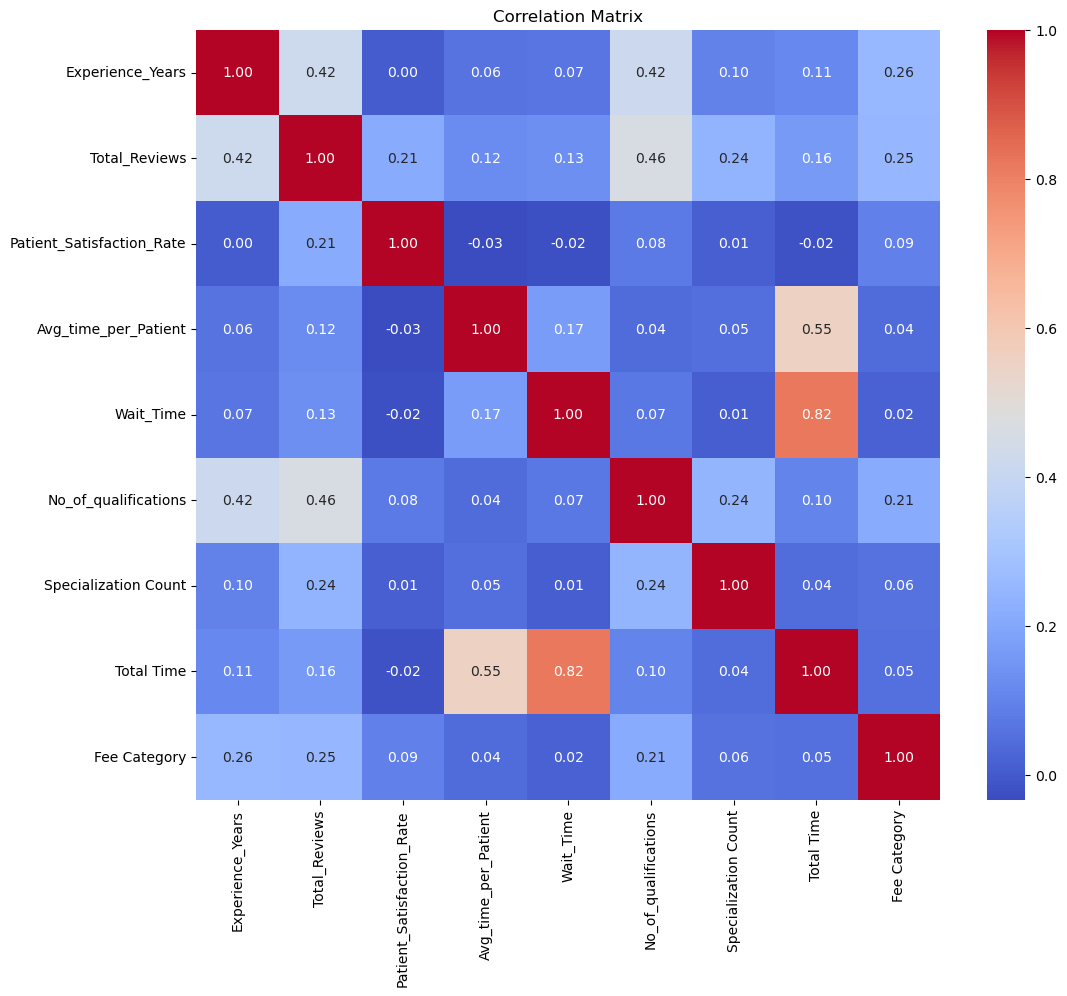

In [164]:
# approproate FS for numeric values
X_with_target = pd.concat([X_train[numerical_columns], y_train], axis=1)

correlation_matrix = X_with_target.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [165]:
from scipy.stats import f_oneway

anova_results = {}
for column in numerical_columns:
    reshaped_feature = X_train[column].values.reshape(-1, 1)

    reshaped_y_train = y_train.values.reshape(-1, 1)

    f_statistic, p_value = f_oneway(reshaped_feature, reshaped_y_train)
    anova_results[column] = {'F-Statistic': f_statistic, 'p-value': p_value}

anova_df = pd.DataFrame(anova_results).transpose()

anova_df = anova_df.sort_values(by='F-Statistic', ascending=False)

print("ANOVA Results:")
anova_df


ANOVA Results:


,F-Statistic,p-value
Patient_Satisfaction_Rate,[653935.2615980107],[0.0]
Avg_time_per_Patient,[39075.47454290037],[0.0]
Total Time,[10538.45775838188],[0.0]
Wait_Time,[5531.140982114148],[0.0]
Experience_Years,[2421.790718469245],[0.0]
No_of_qualifications,[1303.349565724026],[1.32874106477673e-245]
Total_Reviews,[615.5344691705664],[4.7187596876736395e-126]
Specialization Count,[0.04583759048148983],[0.8304828017853769]


In [166]:
from scipy.stats import kendalltau

kendall_results = {}
for column in numerical_columns:
    tau, p_value = kendalltau(X_train[column], y_train)
    kendall_results[column] = {'Kendall\'s': tau, 'p-value': p_value}

kendall_df = pd.DataFrame(kendall_results).transpose()

kendall_df = kendall_df.sort_values(by="Kendall\'s", ascending=False)

print("Kendall's Results:")
kendall_df

Kendall's Results:


,Kendall's,p-value
No_of_qualifications,0.232931,1.265131e-30
Total_Reviews,0.198058,6.157688e-27
Experience_Years,0.179581,1.195310e-22
Patient_Satisfaction_Rate,0.128406,7.460521e-11
Specialization Count,0.065553,2.468897e-03
Avg_time_per_Patient,0.047821,1.482868e-02
Total Time,0.040855,3.368978e-02
Wait_Time,0.009557,6.205811e-01


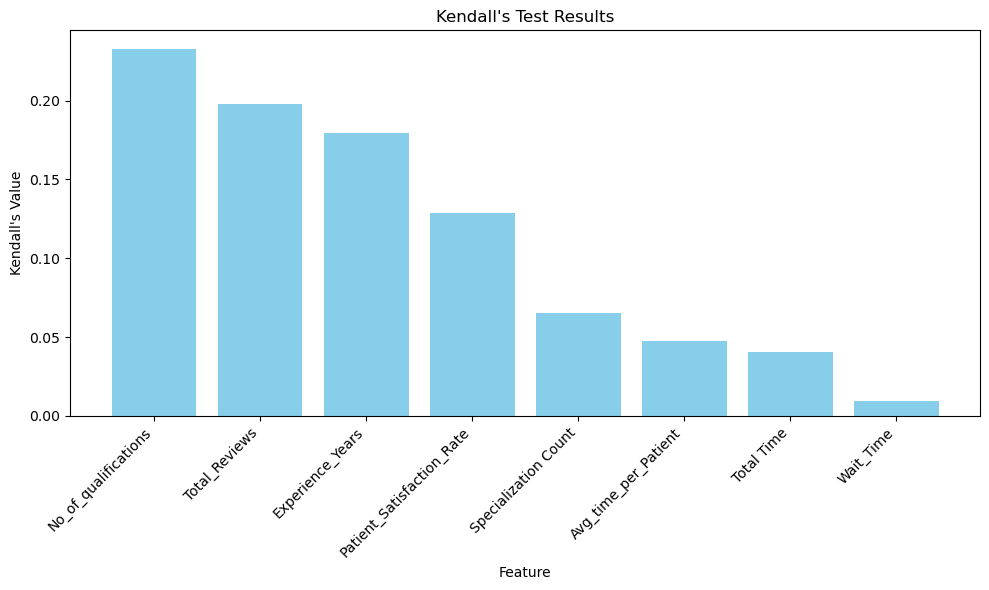

In [167]:
# Plot Kendall's values
plt.figure(figsize=(10, 6))
plt.bar(kendall_df.index, kendall_df["Kendall's"], color='skyblue')
plt.xlabel('Feature')
plt.ylabel("Kendall's Value")
plt.title("Kendall's Test Results")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Given that:</br>
Kendall's Top
* No_of_qualifications </br>
* Total_Reviews </br>
* Experience_Years</br>
* Patient_Satisfaction_Rate</br>
-----------
ANOVA's Top
* Patient_Satisfaction_Rate</br>
* Avg_time_per_Patient</br>
* Total Time</br>
* Wait_Time</br>
-----------
Corr
1.   Experience_Years at 0.26
2.   Total_Reviews at 0.25
3.   No_of_qualifications at 0.21
4.   Patient_Satisfaction_Rate at 0.09
-----------
We can see that Patient_Satisfaction_Rate is among the top four in all tests, while No_of_qualifications, Total_Reviews, and Experience_Years are repeated in two tests.

***We will use Patient_Satisfaction_Rate, No_of_qualifications, Total_Reviews, Experience_Years, and Total Time***

## For Categorical Columns

In [168]:
categorical_columns = [col for col in X_train.columns if col not in numerical_columns]
categorical_columns

['City',
 'Doctor Qualification',
 'Hospital Address',
 'Doctors Link',
 'Titles',
 'Region',
 'Experience_Group',
 'Andrologist',
 'Dermatologist',
 'Ent Specialist',
 'Eye Surgeon',
 'Gastroenterologist',
 'General Physician',
 'Gynecologist',
 'Nephrologist',
 'Neuro Surgeon',
 'Neurologist',
 'Ophthalmologist',
 'Orthopedic Surgeon',
 'Others',
 'Pediatrician',
 'Pulmonologist',
 'Urologist']

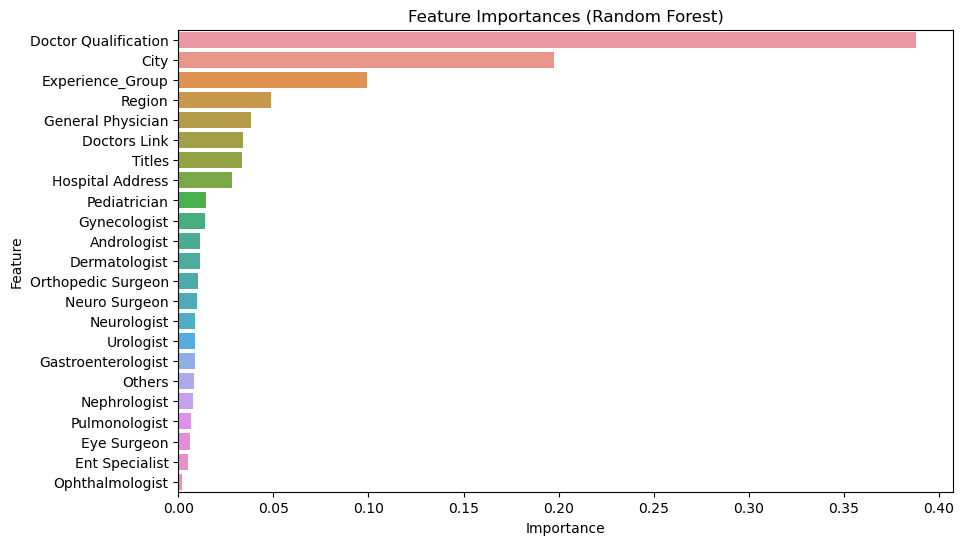

In [169]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train[categorical_columns], y_train)

feature_importances = rf_classifier.feature_importances_


# Create a DataFrame to store feature importances
importance_df_train = pd.DataFrame({'Feature': categorical_columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df_train = importance_df_train.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_train)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Doctor Qualification, City, Experience_Group, and Region are the most effiecient columns.

In [170]:
from sklearn.feature_selection import chi2

chi2_stat, p_values = chi2(X_train[categorical_columns], y_train)

chi2_results = pd.DataFrame({'Feature': categorical_columns, 'Chi-Squared': chi2_stat, 'p-value': p_values})

chi2_results = chi2_results.sort_values(by='Chi-Squared', ascending=False)

chi2_results

,Feature,Chi-Squared,p-value
12,General Physician,262.742283,8.835645e-58
7,Andrologist,90.545813,2.178846e-20
1,Doctor Qualification,60.424331,7.568735e-14
3,Doctors Link,59.826328,1.020652e-13
20,Pediatrician,33.952889,4.238614e-08
2,Hospital Address,31.871923,1.199775e-07
16,Neurologist,22.762277,1.140865e-05
11,Gastroenterologist,21.186445,2.508546e-05
6,Experience_Group,17.021929,2.012496e-04
22,Urologist,13.451592,1.199565e-03


This test shows different results from before as General Physician, Andrologist and	Doctor Qualification are its top features.

In [171]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_scores = mutual_info_classif(X_train[categorical_columns], y_train)

mutual_info_results = pd.DataFrame({'Feature': categorical_columns, 'Mutual Information': mutual_info_scores})

mutual_info_results = mutual_info_results.sort_values(by='Mutual Information', ascending=False)

mutual_info_results

,Feature,Mutual Information
1,Doctor Qualification,0.507974
0,City,0.146594
6,Experience_Group,0.127210
12,General Physician,0.081085
4,Titles,0.070313
3,Doctors Link,0.053233
20,Pediatrician,0.034927
17,Ophthalmologist,0.031965
2,Hospital Address,0.031169
7,Andrologist,0.022900


This test agrees with the RF test by showing that City and Experience_Group are the most important features.

We will use

## For All

In [172]:
from sklearn.feature_selection import SelectFromModel

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

feature_selector = SelectFromModel(rf_classifier)

feature_selector.fit(X_train, y_train)

selected_feature_indices = feature_selector.get_support(indices=True)

selected_features = df_train.columns[selected_feature_indices]

print("Selected Features:", selected_features)


Selected Features: Index(['City', 'Doctor Qualification', 'Experience_Years', 'Total_Reviews',
       'Avg_time_per_Patient', 'Wait_Time', 'Specialization Count',
       'No_of_qualifications', 'Experience_Group'],
      dtype='object')


In [173]:
# Assuming df_train and X_test are your original dataframes
selected_features = ['Total Time','General Physician','Specialization Count','City','Pediatrician','Urologist','Neurologist',
                     'Total_Reviews', 'No_of_qualifications', 'Doctor Qualification', 'Experience_Years', 'Experience_Group',
                     'Patient_Satisfaction_Rate', 'Wait_Time', 'Titles', 'Doctors Link', 'Avg_time_per_Patient',
                     'Hospital Address', 'Gastroenterologist']

In [174]:
len(selected_features)

19

# Modeling

## Lazy Predict

In [175]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [176]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

### No feature Selection

In [177]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:04<00:00,  6.28it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 1898, number of used features: 30
[LightGBM] [Info] Start training from score -1.011864
[LightGBM] [Info] Start training from score -1.603135
[LightGBM] [Info] Start training from score -0.831961


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.78,0.77,None,0.78,0.38
LGBMClassifier,0.77,0.76,None,0.77,0.15
XGBClassifier,0.76,0.75,None,0.76,1.39
AdaBoostClassifier,0.76,0.75,None,0.76,0.13
BaggingClassifier,0.75,0.74,None,0.75,0.10
DecisionTreeClassifier,0.72,0.72,None,0.72,0.03
ExtraTreesClassifier,0.74,0.72,None,0.74,0.33
NuSVC,0.66,0.63,None,0.66,0.26
BernoulliNB,0.61,0.62,None,0.61,0.02


### Feature Selection

In [178]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_selected, X_test_selected, y_train, y_test)
models

100%|██████████| 29/29 [00:02<00:00, 10.41it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 595
[LightGBM] [Info] Number of data points in the train set: 1898, number of used features: 19
[LightGBM] [Info] Start training from score -1.011864
[LightGBM] [Info] Start training from score -1.603135
[LightGBM] [Info] Start training from score -0.831961


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.78,0.77,None,0.78,0.38
XGBClassifier,0.77,0.76,None,0.77,0.18
LGBMClassifier,0.76,0.76,None,0.76,0.14
BaggingClassifier,0.75,0.74,None,0.75,0.08
ExtraTreesClassifier,0.76,0.74,None,0.76,0.30
AdaBoostClassifier,0.75,0.74,None,0.75,0.15
DecisionTreeClassifier,0.73,0.72,None,0.73,0.03
NuSVC,0.68,0.65,None,0.68,0.22
SVC,0.68,0.65,None,0.68,0.21


## Manual Evaluation

In [179]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import time
from joblib import dump
import os

def train_and_evaluate_classifiers(X_train_selected, y_train, X_test_selected, y_test, save_dir="saved_models"):
    # Make sure the save directory exists, if not, create it
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Define classifiers
    classifiers = {
        "Random Forest": RandomForestClassifier(),
        "LightGBM": LGBMClassifier(),
        "XGBoost": XGBClassifier()
    }

    # Initialize empty list to store results
    results = []

    # Train and evaluate classifiers
    for name, clf in classifiers.items():
        start_time = time.time()  # Start timer
        clf.fit(X_train_selected, y_train)
        train_time = time.time() - start_time  # Calculate training time

        # Save the trained model
        model_filename = os.path.join(save_dir, f"{name}_model.joblib")
        dump(clf, model_filename)

        # Predict and evaluate on train set
        pred_time = time.time()
        y_train_pred = clf.predict(X_train_selected)
        test_time = time.time() - pred_time
        train_accuracy = accuracy_score(y_train, y_train_pred)

        # Predict and evaluate on test set

        y_test_pred = clf.predict(X_test_selected)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Append results to list
        results.append({"Model": name,
                        "Train Accuracy": train_accuracy,
                        "Test Accuracy": test_accuracy,
                        "Training Time": train_time,
                        "Testing Time": test_time,
                        "Model File": model_filename})

    # Create DataFrame from list of results
    results_df = pd.DataFrame(results)

    return results_df

# Example usage specifying the directory to save models
results_df = train_and_evaluate_classifiers(X_train_selected, y_train, X_test_selected, y_test, save_dir='C:\\Users\\noura\\Downloads\\final ms2 ml\\Models\\')
results_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 1898, number of used features: 19
[LightGBM] [Info] Start training from score -1.011864
[LightGBM] [Info] Start training from score -1.603135
[LightGBM] [Info] Start training from score -0.831961


,Model,Train Accuracy,Test Accuracy,Training Time,Testing Time,Model File
0,Random Forest,0.99,0.78,0.34,0.03,C:\Users\noura\Downloads\final ms2 ml\Models\R...
1,LightGBM,0.98,0.76,0.11,0.01,C:\Users\noura\Downloads\final ms2 ml\Models\L...
2,XGBoost,0.99,0.77,0.17,0.01,C:\Users\noura\Downloads\final ms2 ml\Models\X...


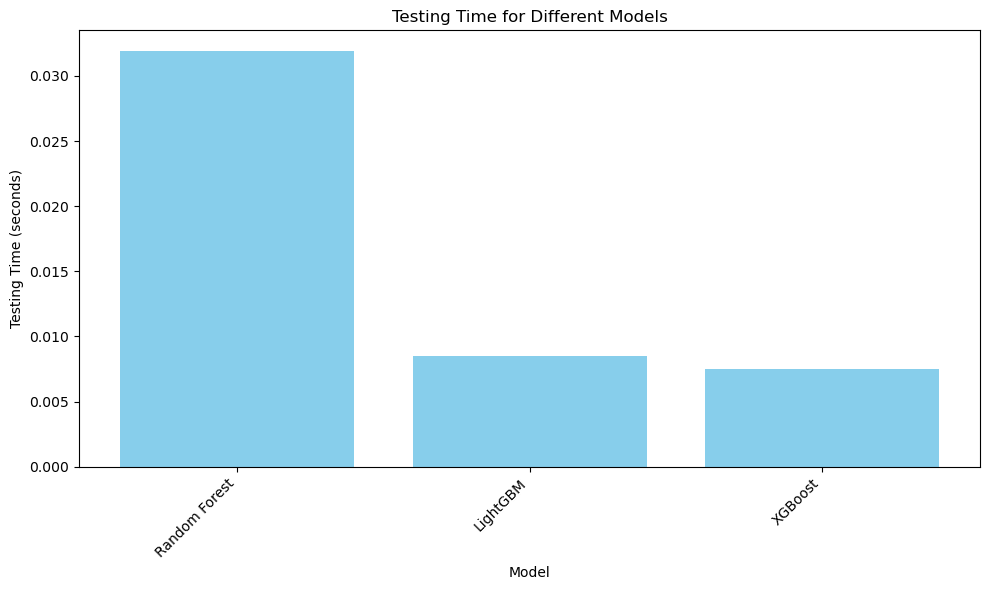

In [180]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Testing Time'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Testing Time (seconds)')
plt.title('Testing Time for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

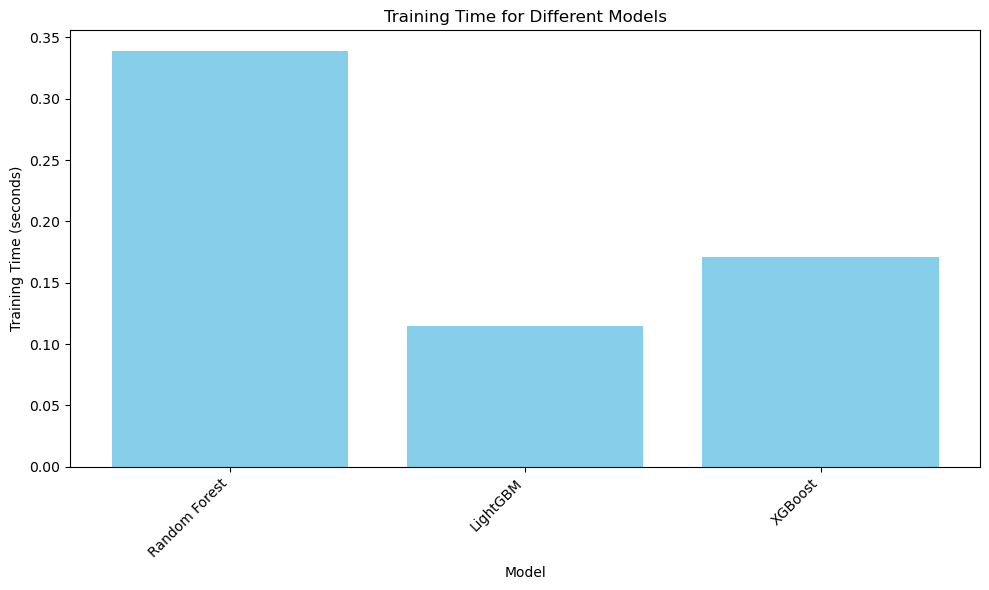

In [181]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Training Time'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Dump all encoders

In [182]:
file_path = 'C:\\Users\\noura\\Downloads\\final ms2 ml\\Models\\fee_encoder.joblib'
dump(fee_encoder, file_path)

file_path = 'C:\\Users\\noura\\Downloads\\final ms2 ml\\Models\\qualification_encoder.joblib'
dump(qualification_encoder, file_path)

file_path = 'C:\\Users\\noura\\Downloads\\final ms2 ml\\Models\\Experience_Group_encoder.joblib'
dump(Experience_Group_encoder, file_path)

file_path = 'C:\\Users\\noura\\Downloads\\final ms2 ml\\Models\\titles_encoder.joblib'
dump(titles_encoder, file_path)

file_path = 'C:\\Users\\noura\\Downloads\\final ms2 ml\\Models\\city_encoder.joblib'
dump(city_encoder, file_path)

file_path = 'C:\\Users\\noura\\Downloads\\final ms2 ml\\Models\\Region_encoder.joblib'
dump(Region_encoder, file_path)

['C:\\Users\\noura\\Downloads\\final ms2 ml\\Models\\Region_encoder.joblib']